# 🤖 NewsBot Intelligence System
## ITAI 2373 - Mid-Term Group Project Template

**Team Members:** Dat Dang Nguyen and Khanh Huynh

**Date:** 10/31/2025
**GitHub Repository:** [Add your repo URL here]

---

## 🎯 Project Overview

Welcome to your NewsBot Intelligence System! This notebook will guide you through building a comprehensive NLP system that:

- 📰 **Processes** news articles with advanced text cleaning
- 🏷️ **Classifies** articles into categories (Politics, Sports, Technology, Business, Entertainment, Health)
- 🔍 **Extracts** named entities (people, organizations, locations, dates, money)
- 😊 **Analyzes** sentiment and emotional tone
- 📊 **Generates** insights for business intelligence

### 📚 Module Integration Checklist
- [ ] **Module 1:** NLP applications and real-world context
- [ ] **Module 2:** Text preprocessing pipeline
- [ ] **Module 3:** TF-IDF feature extraction
- [ ] **Module 4:** POS tagging analysis
- [ ] **Module 5:** Syntax parsing and semantic analysis
- [ ] **Module 6:** Sentiment and emotion analysis
- [ ] **Module 7:** Text classification system
- [ ] **Module 8:** Named Entity Recognition

---

## 📦 Setup and Installation

Let's start by installing and importing all the libraries we'll need for our NewsBot system.

In [ ]:
# Install required packages (run this cell first!)
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng') # Added this line


print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


## 📊 Data Loading and Exploration

### 🎯 Module 1: Understanding Our NLP Application

Before we dive into the technical implementation, let's understand the real-world context of our NewsBot Intelligence System. This system addresses several business needs:

1. **Media Monitoring:** Automatically categorize and track news coverage
2. **Business Intelligence:** Extract key entities and sentiment trends
3. **Content Management:** Organize large volumes of news content
4. **Market Research:** Understand public sentiment about topics and entities

**💡 Discussion Question:** What other real-world applications can you think of for this type of system? Consider different industries and use cases.

In [ ]:
# Load your dataset
# 💡 TIP: If using the provided dataset, upload it to Colab first
# 💡 TIP: You can also use sample datasets like BBC News or 20 Newsgroups

# Option 1: Load provided dataset (assuming it's a CSV file)
df = pd.read_csv('/content/BBC News Train.csv')
print("Loaded data from BBC News Train.csv")


# Option 2: Load BBC News dataset (if using alternative)
# You can download this from: https://www.kaggle.com/c/learn-ai-bbc/data

# Option 3: Create sample data for testing (remove this when you have real data)
# sample_data = {
#     'article_id': range(1, 11),
#     'title': [
#         'Apple Inc. Reports Record Quarterly Earnings',
#         'Manchester United Defeats Chelsea 3-1',
#         'New AI Technology Revolutionizes Healthcare',
#         'President Biden Announces Climate Initiative',
#         'Netflix Releases New Original Series',
#         'Tesla Stock Rises After Production Update',
#         'Olympic Games Begin in Paris',
#         'Google Launches New Search Algorithm',
#         'Congress Passes Infrastructure Bill',
#         'Disney+ Subscriber Numbers Grow'
#     ],
#     'content': [
#         'Apple Inc. announced record quarterly earnings today, with CEO Tim Cook highlighting strong iPhone sales and services revenue growth.',
#         'Manchester United secured a convincing 3-1 victory over Chelsea at Old Trafford, with goals from Marcus Rashford and Bruno Fernandes.',
#         'A breakthrough AI system developed by researchers at Stanford University shows promise for early disease detection in medical imaging.',
#         'President Joe Biden unveiled a comprehensive climate change initiative aimed at reducing carbon emissions by 50% over the next decade.',
#         'Netflix premiered its latest original series to critical acclaim, featuring an ensemble cast and innovative storytelling techniques.',
#         'Tesla shares jumped 8% in after-hours trading following the company\'s announcement of increased production capacity at its Texas facility.',
#         'The 2024 Olympic Games officially began in Paris with a spectacular opening ceremony attended by world leaders and celebrities.',
#         'Google introduced a new search algorithm that promises more accurate and contextually relevant results for users worldwide.',
#         'The U.S. Congress passed a bipartisan infrastructure bill allocating $1.2 trillion for roads, bridges, and broadband expansion.',
#         'Disney+ reported strong subscriber growth in Q3, reaching 150 million subscribers globally across all markets.'
#     ],
#     'category': ['Business', 'Sports', 'Technology', 'Politics', 'Entertainment',
#                 'Business', 'Sports', 'Technology', 'Politics', 'Entertainment'],
#     'date': ['2024-01-15'] * 10,
#     'source': ['TechNews', 'SportsTimes', 'TechDaily', 'PoliticsToday', 'EntertainmentWeekly',
#               'BusinessWire', 'SportsCentral', 'TechReview', 'NewsNow', 'ShowBiz']
# }


print(f"📊 Dataset loaded successfully!")
print(f"📈 Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Display first few rows
display(df.head())

Loaded data from BBC News Train.csv
📊 Dataset loaded successfully!
📈 Shape: (1490, 3)
📋 Columns: ['ArticleId', 'Text', 'Category']


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


📊 DATASET OVERVIEW
Total articles: 1490
Unique categories: 5
Categories: ['business', 'tech', 'politics', 'sport', 'entertainment']

📈 CATEGORY DISTRIBUTION
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


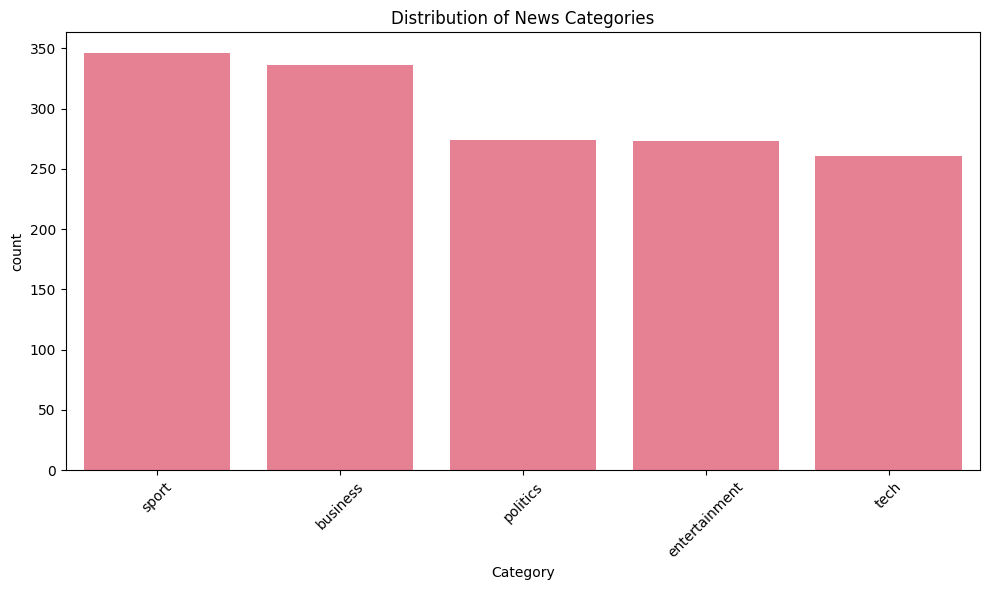


🔍 MISSING VALUES
No missing values found.

✏️ TEXT LENGTH DISTRIBUTION
Average text length: 2233.46
Minimum text length: 501
Maximum text length: 18387


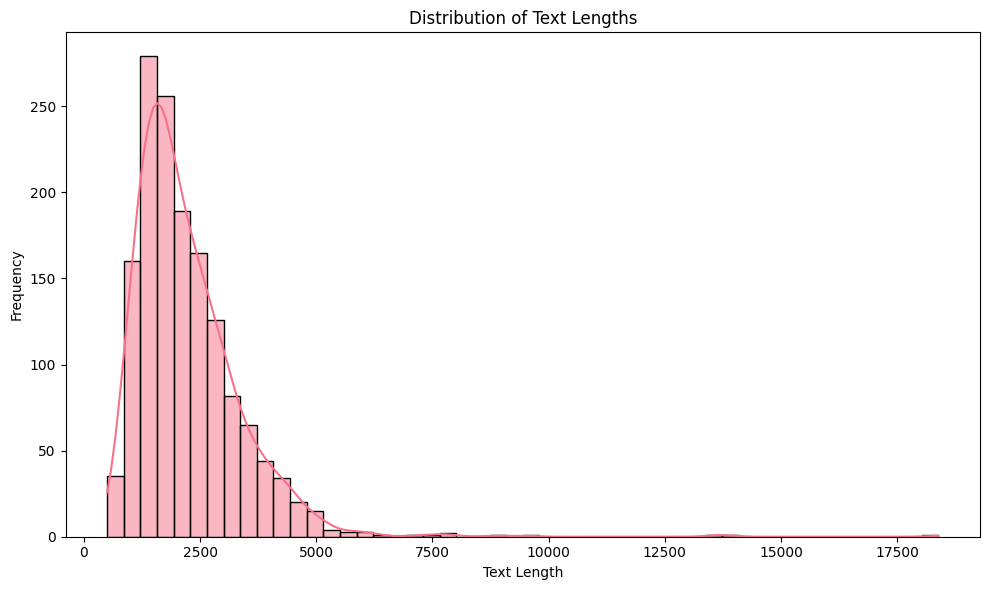


🧼 DUPLICATE ENTRIES
Duplicate rows: 0
Duplicate texts: 50


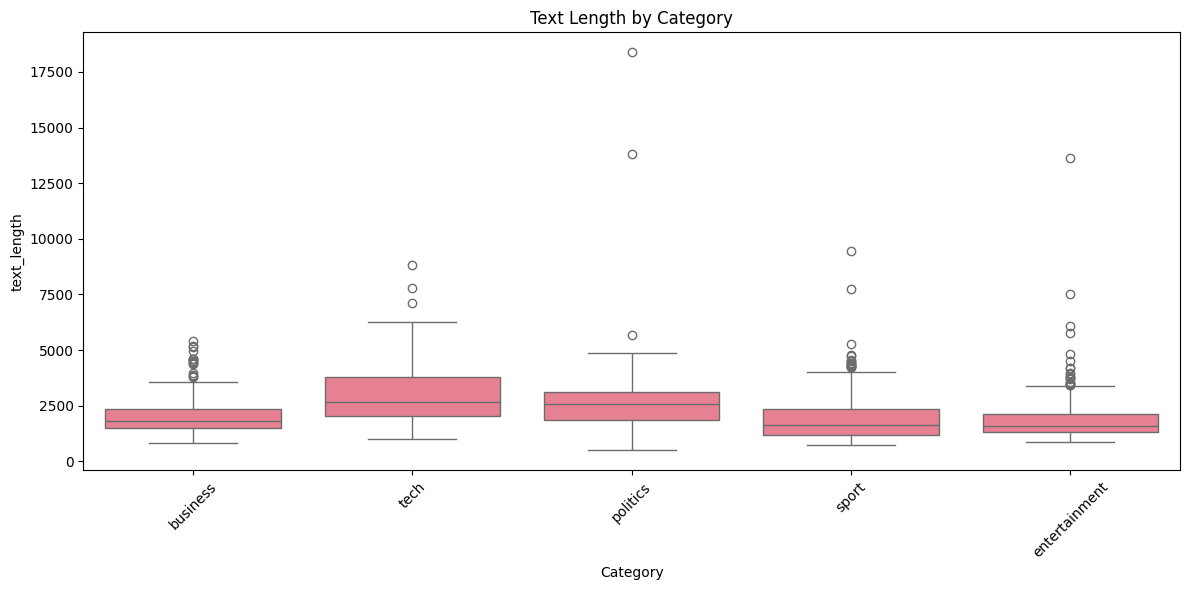

In [ ]:
# Basic dataset exploration
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Total articles: {len(df)}")
print(f"Unique categories: {df['Category'].nunique()}")
print(f"Categories: {df['Category'].unique().tolist()}")
# print(f"Date range: {df['date'].min()} to {df['date'].max()}") # Columns 'date' and 'source' do not exist in the dataframe
# print(f"Unique sources: {df['source'].nunique()}")

print("\n📈 CATEGORY DISTRIBUTION")
print("=" * 50)
category_counts = df['Category'].value_counts()
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=category_counts.index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Add your own exploratory analysis here
# - Check for missing values
# - Analyze text length distribution
# - Examine source distribution
# - Look for any data quality issues

# 🔍 CHECK FOR MISSING VALUES
print("\n🔍 MISSING VALUES")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

# ✏️ ANALYZE TEXT LENGTH DISTRIBUTION
print("\n✏️ TEXT LENGTH DISTRIBUTION")
print("=" * 50)
df['text_length'] = df['Text'].apply(len)

print(f"Average text length: {df['text_length'].mean():.2f}")
print(f"Minimum text length: {df['text_length'].min()}")
print(f"Maximum text length: {df['text_length'].max()}")

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 🧼 CHECK FOR DUPLICATES
print("\n🧼 DUPLICATE ENTRIES")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# 🆔 CHECK FOR DUPLICATE TEXTS ONLY (even if other columns differ)
duplicate_texts = df['Text'].duplicated().sum()
print(f"Duplicate texts: {duplicate_texts}")

# 🔠 DISTRIBUTION OF TEXT LENGTH BY CATEGORY
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='text_length')
plt.title('Text Length by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






🔍 COMPREHENSIVE DATA QUALITY ANALYSIS

1️⃣ EMPTY/WHITESPACE TEXT CHECK
--------------------------------------------------
Empty or whitespace-only texts: 0

2️⃣ VERY SHORT TEXT CHECK
--------------------------------------------------
Texts shorter than 50 characters: 0

3️⃣ VERY LONG TEXT CHECK
--------------------------------------------------
Texts longer than 99th percentile (5683 chars): 15

4️⃣ ENCODING/SPECIAL CHARACTER CHECK
--------------------------------------------------
Texts with potential encoding issues: 0
Texts with >30% special characters: 0

5️⃣ NUMERIC-HEAVY TEXT CHECK
--------------------------------------------------
Texts with >50% digits: 0

6️⃣ EXACT DUPLICATE TEXT ANALYSIS
--------------------------------------------------
Total texts that are exact duplicates: 100

Duplicate text groups:
Number of duplicate groups: 50
Most duplicated text appears 2 times

7️⃣ NEAR-DUPLICATE CHECK (sample)
--------------------------------------------------
Texts with identical

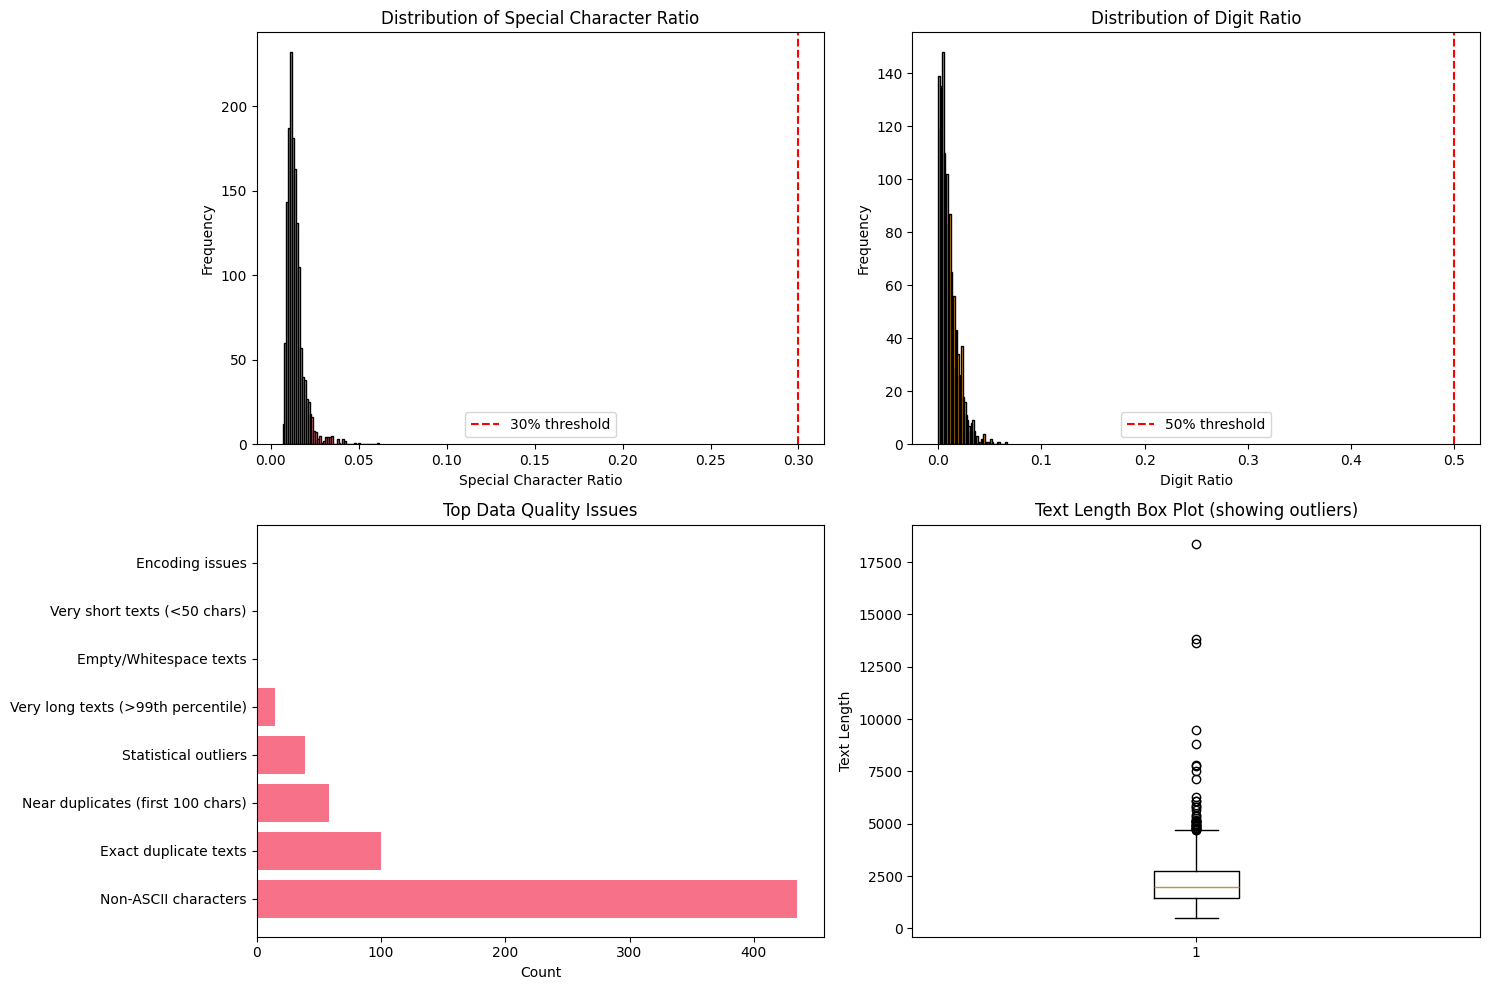


✅ Data quality analysis complete!


In [ ]:
# 🔍 DATA QUALITY CHECKS
print("\n" + "="*70)
print("🔍 COMPREHENSIVE DATA QUALITY ANALYSIS")
print("="*70)

# 1. CHECK FOR EMPTY OR WHITESPACE-ONLY TEXT
print("\n1️⃣ EMPTY/WHITESPACE TEXT CHECK")
print("-" * 50)
empty_text = df['Text'].str.strip().str.len() == 0
print(f"Empty or whitespace-only texts: {empty_text.sum()}")
if empty_text.sum() > 0:
    print(f"Indices of empty texts: {df[empty_text].index.tolist()}")

# 2. CHECK FOR VERY SHORT TEXTS (potential data quality issue)
print("\n2️⃣ VERY SHORT TEXT CHECK")
print("-" * 50)
very_short = df['text_length'] < 50  # Texts with less than 50 characters
print(f"Texts shorter than 50 characters: {very_short.sum()}")
if very_short.sum() > 0:
    print(f"Sample of short texts:\n{df[very_short][['Category', 'Text', 'text_length']].head()}")

# 3. CHECK FOR VERY LONG TEXTS (potential outliers)
print("\n3️⃣ VERY LONG TEXT CHECK")
print("-" * 50)
q99 = df['text_length'].quantile(0.99)
very_long = df['text_length'] > q99
print(f"Texts longer than 99th percentile ({q99:.0f} chars): {very_long.sum()}")

# 4. CHECK FOR SPECIAL CHARACTERS OR ENCODING ISSUES
print("\n4️⃣ ENCODING/SPECIAL CHARACTER CHECK")
print("-" * 50)
# Check for common encoding issues - Fixed regex pattern
encoding_issues = df['Text'].str.contains('�|\xef|\xbf|\xbd', na=False, regex=True)
print(f"Texts with potential encoding issues: {encoding_issues.sum()}")

# Check for excessive special characters
def count_special_chars(text):
    return sum(not c.isalnum() and not c.isspace() for c in text)

df['special_char_count'] = df['Text'].apply(count_special_chars)
df['special_char_ratio'] = df['special_char_count'] / df['text_length']
high_special_chars = df['special_char_ratio'] > 0.3  # More than 30% special chars
print(f"Texts with >30% special characters: {high_special_chars.sum()}")

# 5. CHECK FOR NUMERIC-HEAVY TEXT (potential data corruption)
print("\n5️⃣ NUMERIC-HEAVY TEXT CHECK")
print("-" * 50)
def digit_ratio(text):
    return sum(c.isdigit() for c in text) / len(text) if len(text) > 0 else 0

df['digit_ratio'] = df['Text'].apply(digit_ratio)
high_digits = df['digit_ratio'] > 0.5  # More than 50% digits
print(f"Texts with >50% digits: {high_digits.sum()}")

# 6. CHECK FOR EXACT DUPLICATE TEXTS
print("\n6️⃣ EXACT DUPLICATE TEXT ANALYSIS")
print("-" * 50)
duplicate_text_mask = df['Text'].duplicated(keep=False)
print(f"Total texts that are exact duplicates: {duplicate_text_mask.sum()}")
if duplicate_text_mask.sum() > 0:
    print(f"\nDuplicate text groups:")
    duplicate_groups = df[duplicate_text_mask].groupby('Text').size().sort_values(ascending=False)
    print(f"Number of duplicate groups: {len(duplicate_groups)}")
    print(f"Most duplicated text appears {duplicate_groups.max()} times")

# 7. CHECK FOR NEAR-DUPLICATES (similar texts)
print("\n7️⃣ NEAR-DUPLICATE CHECK (sample)")
print("-" * 50)
# Sample check for texts that start the same way (first 100 chars)
df['text_start'] = df['Text'].str[:100]
near_duplicates = df['text_start'].duplicated().sum()
print(f"Texts with identical first 100 characters: {near_duplicates}")

# 8. CHECK CATEGORY DATA QUALITY
print("\n8️⃣ CATEGORY DATA QUALITY")
print("-" * 50)
print(f"Missing categories: {df['Category'].isnull().sum()}")
print(f"Empty string categories: {(df['Category'] == '').sum()}")
# Check for inconsistent category naming (extra spaces, mixed case)
category_with_spaces = df['Category'].str.strip() != df['Category']
print(f"Categories with leading/trailing spaces: {category_with_spaces.sum()}")

# 9. TEXT STATISTICAL OUTLIERS
print("\n9️⃣ TEXT LENGTH OUTLIERS")
print("-" * 50)
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['text_length'] < lower_bound) | (df['text_length'] > upper_bound)
print(f"Statistical outliers (IQR method): {outliers.sum()}")
print(f"Lower bound: {lower_bound:.0f}, Upper bound: {upper_bound:.0f}")

# 10. CHECK FOR HTML/XML TAGS (potential cleaning needed)
print("\n🔟 HTML/XML TAG CHECK")
print("-" * 50)
html_pattern = '<[^>]+>'
has_html = df['Text'].str.contains(html_pattern, na=False, regex=True)
print(f"Texts containing HTML/XML tags: {has_html.sum()}")

# 11. CHECK FOR URLS (might need cleaning)
print("\n1️⃣1️⃣ URL CHECK")
print("-" * 50)
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
has_urls = df['Text'].str.contains(url_pattern, na=False, regex=True)
print(f"Texts containing URLs: {has_urls.sum()}")

# 12. LANGUAGE CHECK (if relevant - basic check for non-ASCII)
print("\n1️⃣2️⃣ NON-ASCII CHARACTER CHECK")
print("-" * 50)
def has_non_ascii(text):
    return any(ord(char) > 127 for char in text)

non_ascii = df['Text'].apply(has_non_ascii)
print(f"Texts with non-ASCII characters: {non_ascii.sum()}")

# 13. SUMMARY STATISTICS BY CATEGORY
print("\n1️⃣3️⃣ TEXT LENGTH SUMMARY BY CATEGORY")
print("-" * 50)
print(df.groupby('Category')['text_length'].describe()[['count', 'mean', 'std', 'min', 'max']])

# 14. CREATE DATA QUALITY SUMMARY
print("\n" + "="*70)
print("📋 DATA QUALITY SUMMARY")
print("="*70)

quality_issues = {
    'Empty/Whitespace texts': empty_text.sum(),
    'Very short texts (<50 chars)': very_short.sum(),
    'Very long texts (>99th percentile)': very_long.sum(),
    'Encoding issues': encoding_issues.sum(),
    'High special character ratio': high_special_chars.sum(),
    'High digit ratio': high_digits.sum(),
    'Exact duplicate texts': duplicate_text_mask.sum(),
    'Near duplicates (first 100 chars)': near_duplicates,
    'Missing categories': df['Category'].isnull().sum(),
    'Statistical outliers': outliers.sum(),
    'HTML/XML tags present': has_html.sum(),
    'URLs present': has_urls.sum(),
    'Non-ASCII characters': non_ascii.sum()
}

quality_df = pd.DataFrame(list(quality_issues.items()),
                          columns=['Issue Type', 'Count'])
quality_df['Percentage'] = (quality_df['Count'] / len(df) * 100).round(2)
print(quality_df.to_string(index=False))

# 15. VISUALIZE DATA QUALITY ISSUES
print("\n📊 VISUALIZING KEY DATA QUALITY METRICS")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Special character ratio distribution
axes[0, 0].hist(df['special_char_ratio'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Special Character Ratio')
axes[0, 0].set_xlabel('Special Character Ratio')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(0.3, color='r', linestyle='--', label='30% threshold')
axes[0, 0].legend()

# Plot 2: Digit ratio distribution
axes[0, 1].hist(df['digit_ratio'], bins=50, edgecolor='black', color='orange')
axes[0, 1].set_title('Distribution of Digit Ratio')
axes[0, 1].set_xlabel('Digit Ratio')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(0.5, color='r', linestyle='--', label='50% threshold')
axes[0, 1].legend()

# Plot 3: Data quality issues bar chart
top_issues = quality_df.nlargest(8, 'Count')
axes[1, 0].barh(top_issues['Issue Type'], top_issues['Count'])
axes[1, 0].set_title('Top Data Quality Issues')
axes[1, 0].set_xlabel('Count')

# Plot 4: Text length outliers
axes[1, 1].boxplot(df['text_length'])
axes[1, 1].set_title('Text Length Box Plot (showing outliers)')
axes[1, 1].set_ylabel('Text Length')

plt.tight_layout()
plt.show()

# Optional: Clean up temporary columns if desired
# df.drop(['special_char_count', 'special_char_ratio', 'digit_ratio', 'text_start'],
#         axis=1, inplace=True)

print("\n✅ Data quality analysis complete!")

## 🧹 Text Preprocessing Pipeline

### 🎯 Module 2: Advanced Text Preprocessing

Now we'll implement a comprehensive text preprocessing pipeline that cleans and normalizes our news articles. This is crucial for all downstream NLP tasks.

**Key Preprocessing Steps:**
1. **Text Cleaning:** Remove HTML, URLs, special characters
2. **Tokenization:** Split text into individual words
3. **Normalization:** Convert to lowercase, handle contractions
4. **Stop Word Removal:** Remove common words that don't carry meaning
5. **Lemmatization:** Reduce words to their base form

**💡 Think About:** Why is preprocessing so important? What happens if we skip these steps?

In [ ]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Comprehensive text cleaning function

    💡 TIP: This function should handle:
    - HTML tags and entities
    - URLs and email addresses
    - Special characters and numbers
    - Extra whitespace
    """
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # 🚀 YOUR CODE HERE: Implement text cleaning
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    """
    Complete preprocessing pipeline

    💡 TIP: This function should:
    - Clean the text
    - Tokenize into words
    - Remove stop words (optional)
    - Lemmatize words (optional)
    - Return processed text
    """
    # Clean text
    text = clean_text(text)

    if not text:
        return ""

    # 🚀 YOUR CODE HERE: Implement tokenization and preprocessing
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words if requested
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize if requested
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Filter out very short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Test the preprocessing function
sample_text = "1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,business"
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\nFully preprocessed text:")
print(preprocess_text(sample_text))

Original text:
1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used 

🧹 Preprocessing all articles...
✅ Preprocessing complete!

📝 BEFORE AND AFTER EXAMPLES

Example 1:
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
Processed: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...

Example 2:
Original: german business confidence slides german business confidence fell in february knocking hopes of a sp...
Processed: german business confidence slide german business confidence fell february knocking hope speedy recov...

Example 3:
Original: bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...
Processed: bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...

 TEXT LENGTH BEFORE AND AFTER PREPROCESSING
Average length BEFORE preprocessing: 385.01 words
Average length AFTER preprocessing: 207.01 words


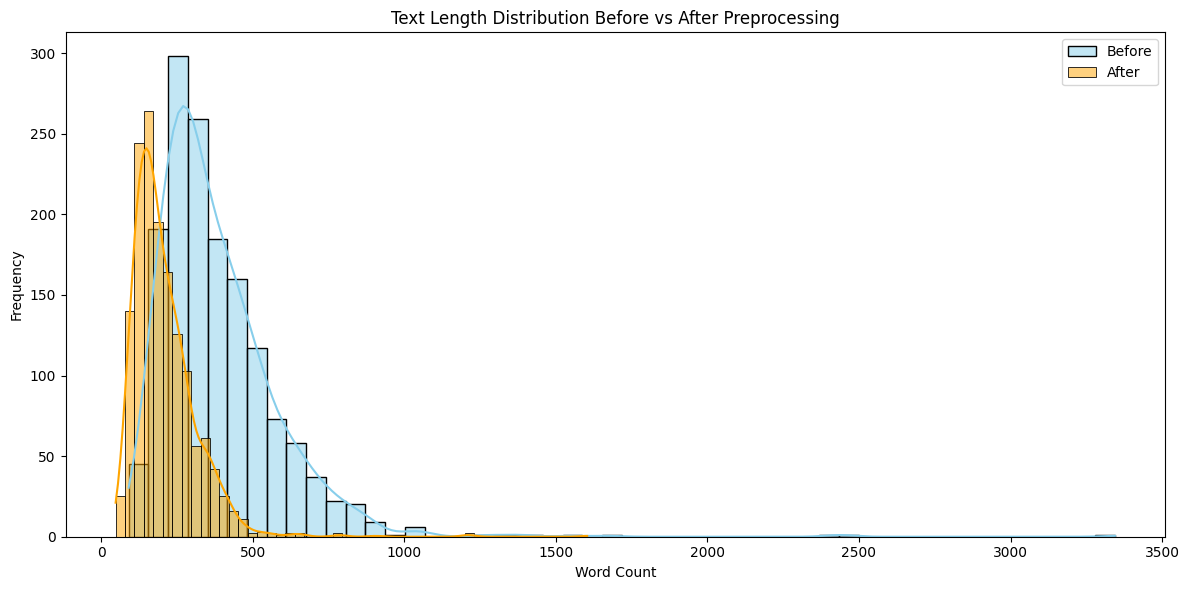


 UNIQUE WORD COUNTS BEFORE AND AFTER
Unique words BEFORE preprocessing: 35594
Unique words AFTER preprocessing: 22486

 MOST COMMON WORDS AFTER PREPROCESSING
said: 4838
year: 1872
would: 1711
also: 1426
new: 1334
people: 1323
one: 1190
could: 1032
game: 949
time: 940
first: 893
last: 883
say: 844
two: 816
world: 811
film: 802
government: 771
make: 695
company: 682
firm: 675


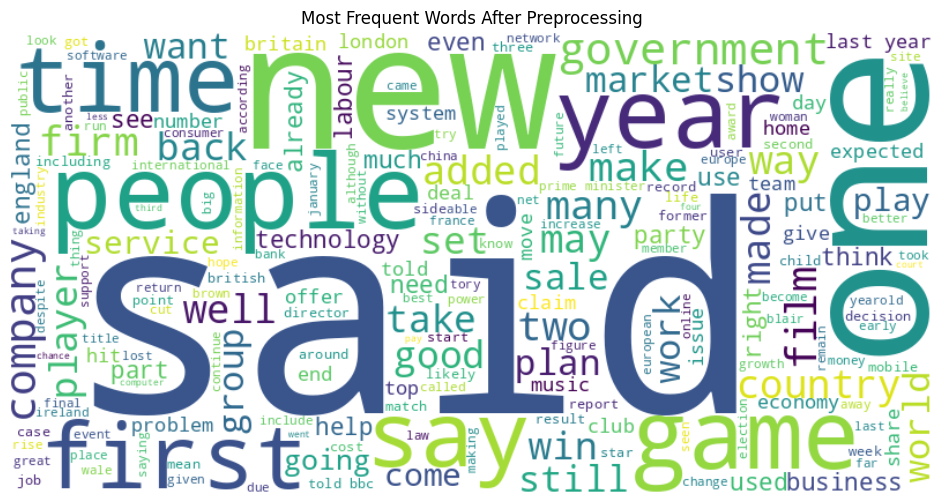

In [ ]:
# Apply preprocessing to the dataset
print("🧹 Preprocessing all articles...")

# Create new columns for processed text
df['title_clean'] = df['Text'].apply(clean_text)
df['content_clean'] = df['Text'].apply(clean_text)
df['title_processed'] = df['Text'].apply(preprocess_text)
df['content_processed'] = df['Text'].apply(preprocess_text)

# Combine title and content for full article analysis
df['full_text'] = df['Text'] # Use 'Text' as the full text
df['full_text_processed'] = df['full_text'].apply(preprocess_text)

print("✅ Preprocessing complete!")

# Show before and after examples
print("\n📝 BEFORE AND AFTER EXAMPLES")
print("=" * 60)
for i in range(min(3, len(df))):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['full_text'][:100]}...")
    print(f"Processed: {df.iloc[i]['full_text_processed'][:100]}...")

# 💡 STUDENT TASK: Analyze the preprocessing results
# - Calculate average text length before and after
# - Count unique words before and after
# - Identify the most common words after preprocessing
from collections import Counter
from wordcloud import WordCloud

# AVERAGE TEXT LENGTH BEFORE AND AFTER PREPROCESSING
print("\n TEXT LENGTH BEFORE AND AFTER PREPROCESSING")
print("=" * 60)

# Word counts
df['text_length_before'] = df['full_text'].apply(lambda x: len(x.split()))
df['text_length_after'] = df['full_text_processed'].apply(lambda x: len(x.split()))

print(f"Average length BEFORE preprocessing: {df['text_length_before'].mean():.2f} words")
print(f"Average length AFTER preprocessing: {df['text_length_after'].mean():.2f} words")

# Histogram comparison
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length_before'], bins=50, label='Before', color='skyblue', kde=True)
sns.histplot(df['text_length_after'], bins=50, label='After', color='orange', kde=True)
plt.legend()
plt.title('Text Length Distribution Before vs After Preprocessing')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# COUNT UNIQUE WORDS BEFORE AND AFTER
print("\n UNIQUE WORD COUNTS BEFORE AND AFTER")
print("=" * 60)

all_words_before = ' '.join(df['full_text']).split()
all_words_after = ' '.join(df['full_text_processed']).split()

unique_words_before = set(all_words_before)
unique_words_after = set(all_words_after)

print(f"Unique words BEFORE preprocessing: {len(unique_words_before)}")
print(f"Unique words AFTER preprocessing: {len(unique_words_after)}")

# MOST COMMON WORDS AFTER PREPROCESSING
print("\n MOST COMMON WORDS AFTER PREPROCESSING")
print("=" * 60)

# Flatten all words into a list
word_freq = Counter(all_words_after)
common_words = word_freq.most_common(20)

# Display top 20
for word, freq in common_words:
    print(f"{word}: {freq}")

# Optional: WordCloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words_after))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words After Preprocessing')
plt.show()


## 📊 Feature Extraction and Statistical Analysis

### 🎯 Module 3: TF-IDF Analysis

Now we'll extract numerical features from our text using TF-IDF (Term Frequency-Inverse Document Frequency). This technique helps us identify the most important words in each document and across the entire corpus.

**TF-IDF Key Concepts:**
- **Term Frequency (TF):** How often a word appears in a document
- **Inverse Document Frequency (IDF):** How rare a word is across all documents
- **TF-IDF Score:** TF × IDF - balances frequency with uniqueness

**💡 Business Value:** TF-IDF helps us identify the most distinctive and important terms for each news category.

In [ ]:
# Create TF-IDF vectorizer
# 💡 TIP: Experiment with different parameters:
# - max_features: limit vocabulary size
# - ngram_range: include phrases (1,1) for words, (1,2) for words+bigrams
# - min_df: ignore terms that appear in less than min_df documents
# - max_df: ignore terms that appear in more than max_df fraction of documents

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary for computational efficiency
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8  # Ignore terms that appear in more than 80% of documents
)

# Fit and transform the processed text
print("🔢 Creating TF-IDF features...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['full_text_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created!")
print(f"📊 Shape: {tfidf_matrix.shape}")
print(f"📝 Vocabulary size: {len(feature_names)}")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['category'] = df['Category'].values

print("\n🔍 Sample TF-IDF features:")
print(tfidf_df.iloc[:3, :10])  # Show first 3 rows and 10 features

🔢 Creating TF-IDF features...
✅ TF-IDF matrix created!
📊 Shape: (1490, 5000)
📝 Vocabulary size: 5000
🔢 Sparsity: 97.50%

🔍 Sample TF-IDF features:
   abbas  abc  ability  able  abroad  absence  absolute  absolutely  abuse  \
0    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
1    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
2    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   

   abused  
0     0.0  
1     0.0  
2     0.0  


🏷️ TOP TF-IDF TERMS BY CATEGORY

📰 BUSINESS:
  firm: 0.0390
  company: 0.0371
  market: 0.0344
  bank: 0.0336
  year: 0.0334
  growth: 0.0332
  economy: 0.0317
  sale: 0.0316
  share: 0.0307
  profit: 0.0274

📰 TECH:
  mobile: 0.0513
  phone: 0.0468
  people: 0.0457
  technology: 0.0410
  game: 0.0381
  user: 0.0377
  service: 0.0369
  software: 0.0365
  computer: 0.0329
  net: 0.0308

📰 POLITICS:
  labour: 0.0648
  election: 0.0604
  blair: 0.0558
  party: 0.0538
  tory: 0.0463
  would: 0.0456
  government: 0.0455
  minister: 0.0427
  brown: 0.0384
  tax: 0.0330

📰 SPORT:
  game: 0.0448
  england: 0.0375
  win: 0.0342
  player: 0.0323
  match: 0.0304
  champion: 0.0293
  cup: 0.0278
  team: 0.0260
  chelsea: 0.0255
  injury: 0.0249

📰 ENTERTAINMENT:
  film: 0.1000
  award: 0.0524
  best: 0.0460
  show: 0.0376
  star: 0.0375
  music: 0.0357
  band: 0.0350
  actor: 0.0339
  year: 0.0300
  album: 0.0291

 WORD CLOUDS BY CATEGORY


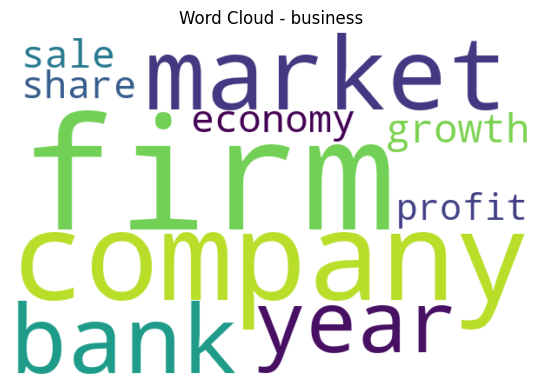

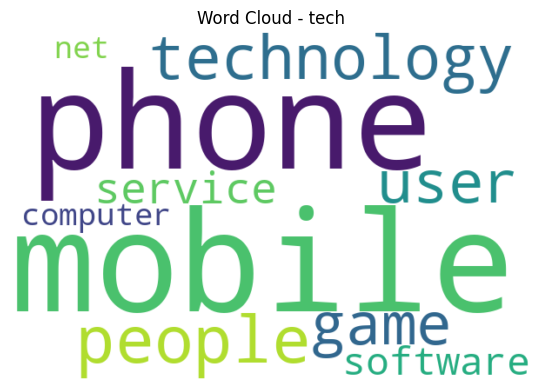

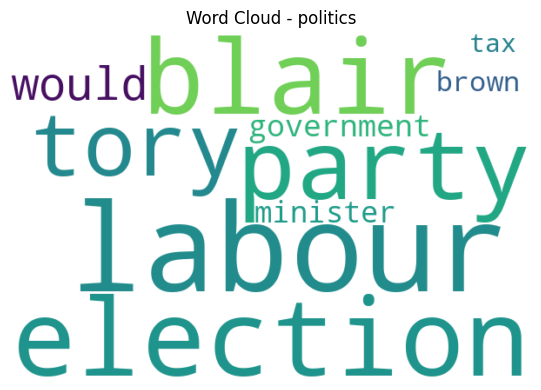

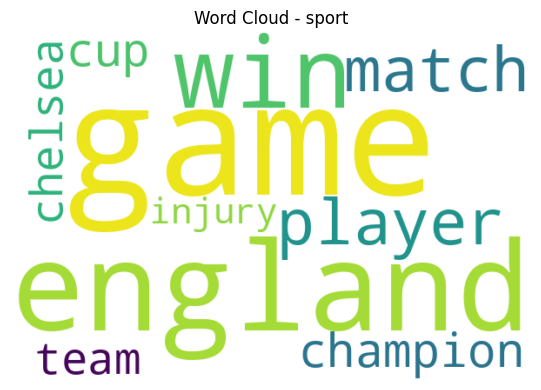

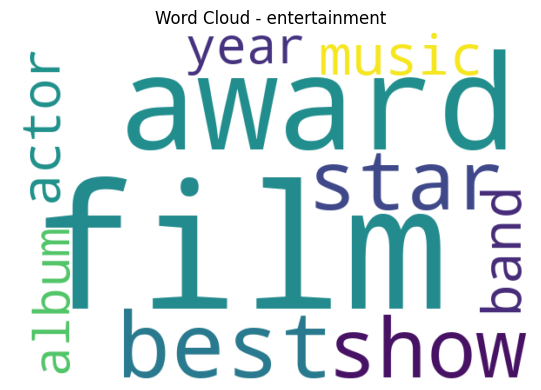


 BAR CHARTS OF TOP TERMS


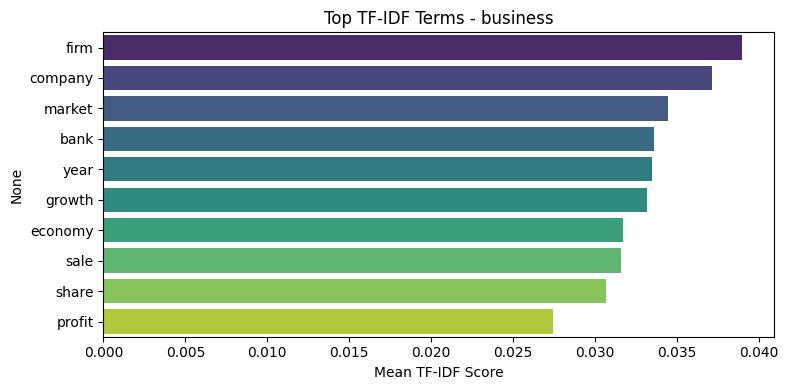

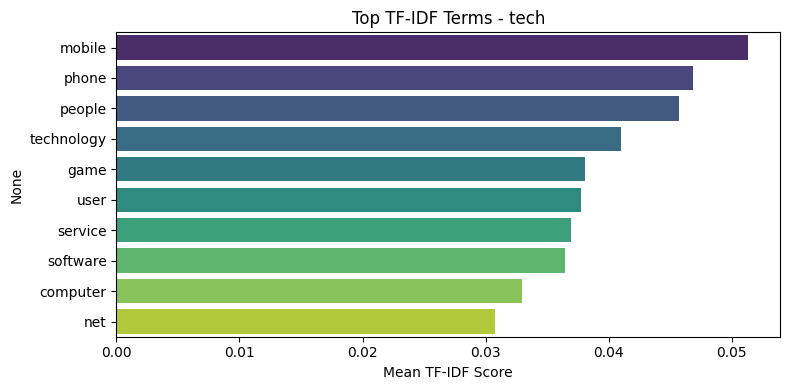

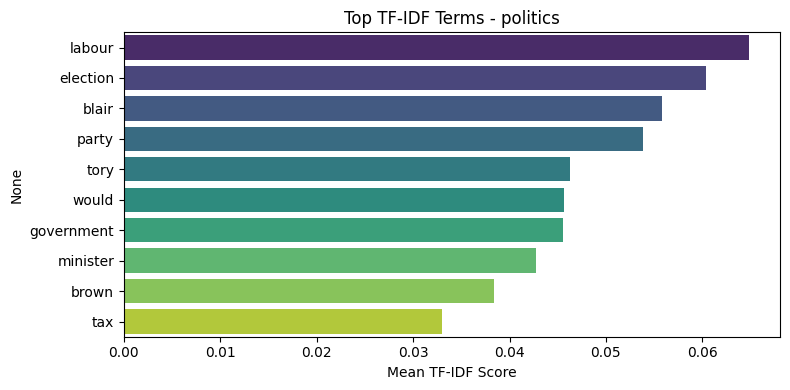

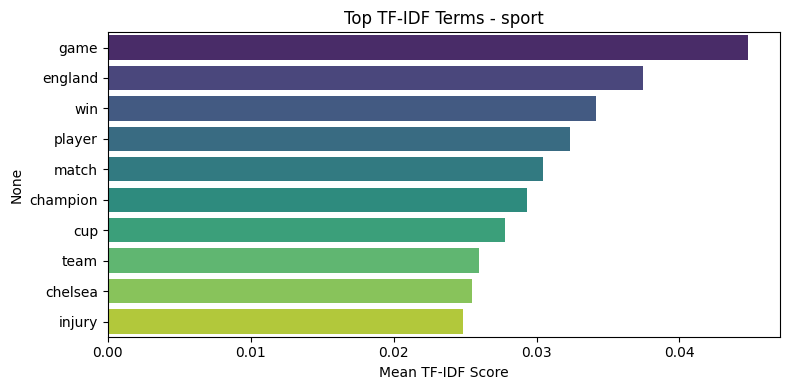

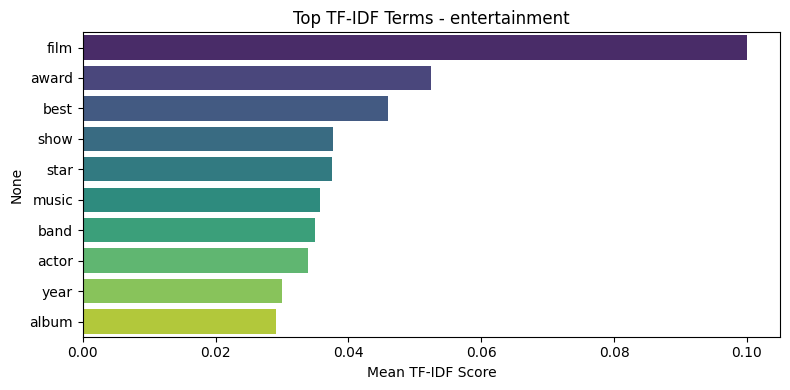


 HEATMAP OF TERM IMPORTANCE


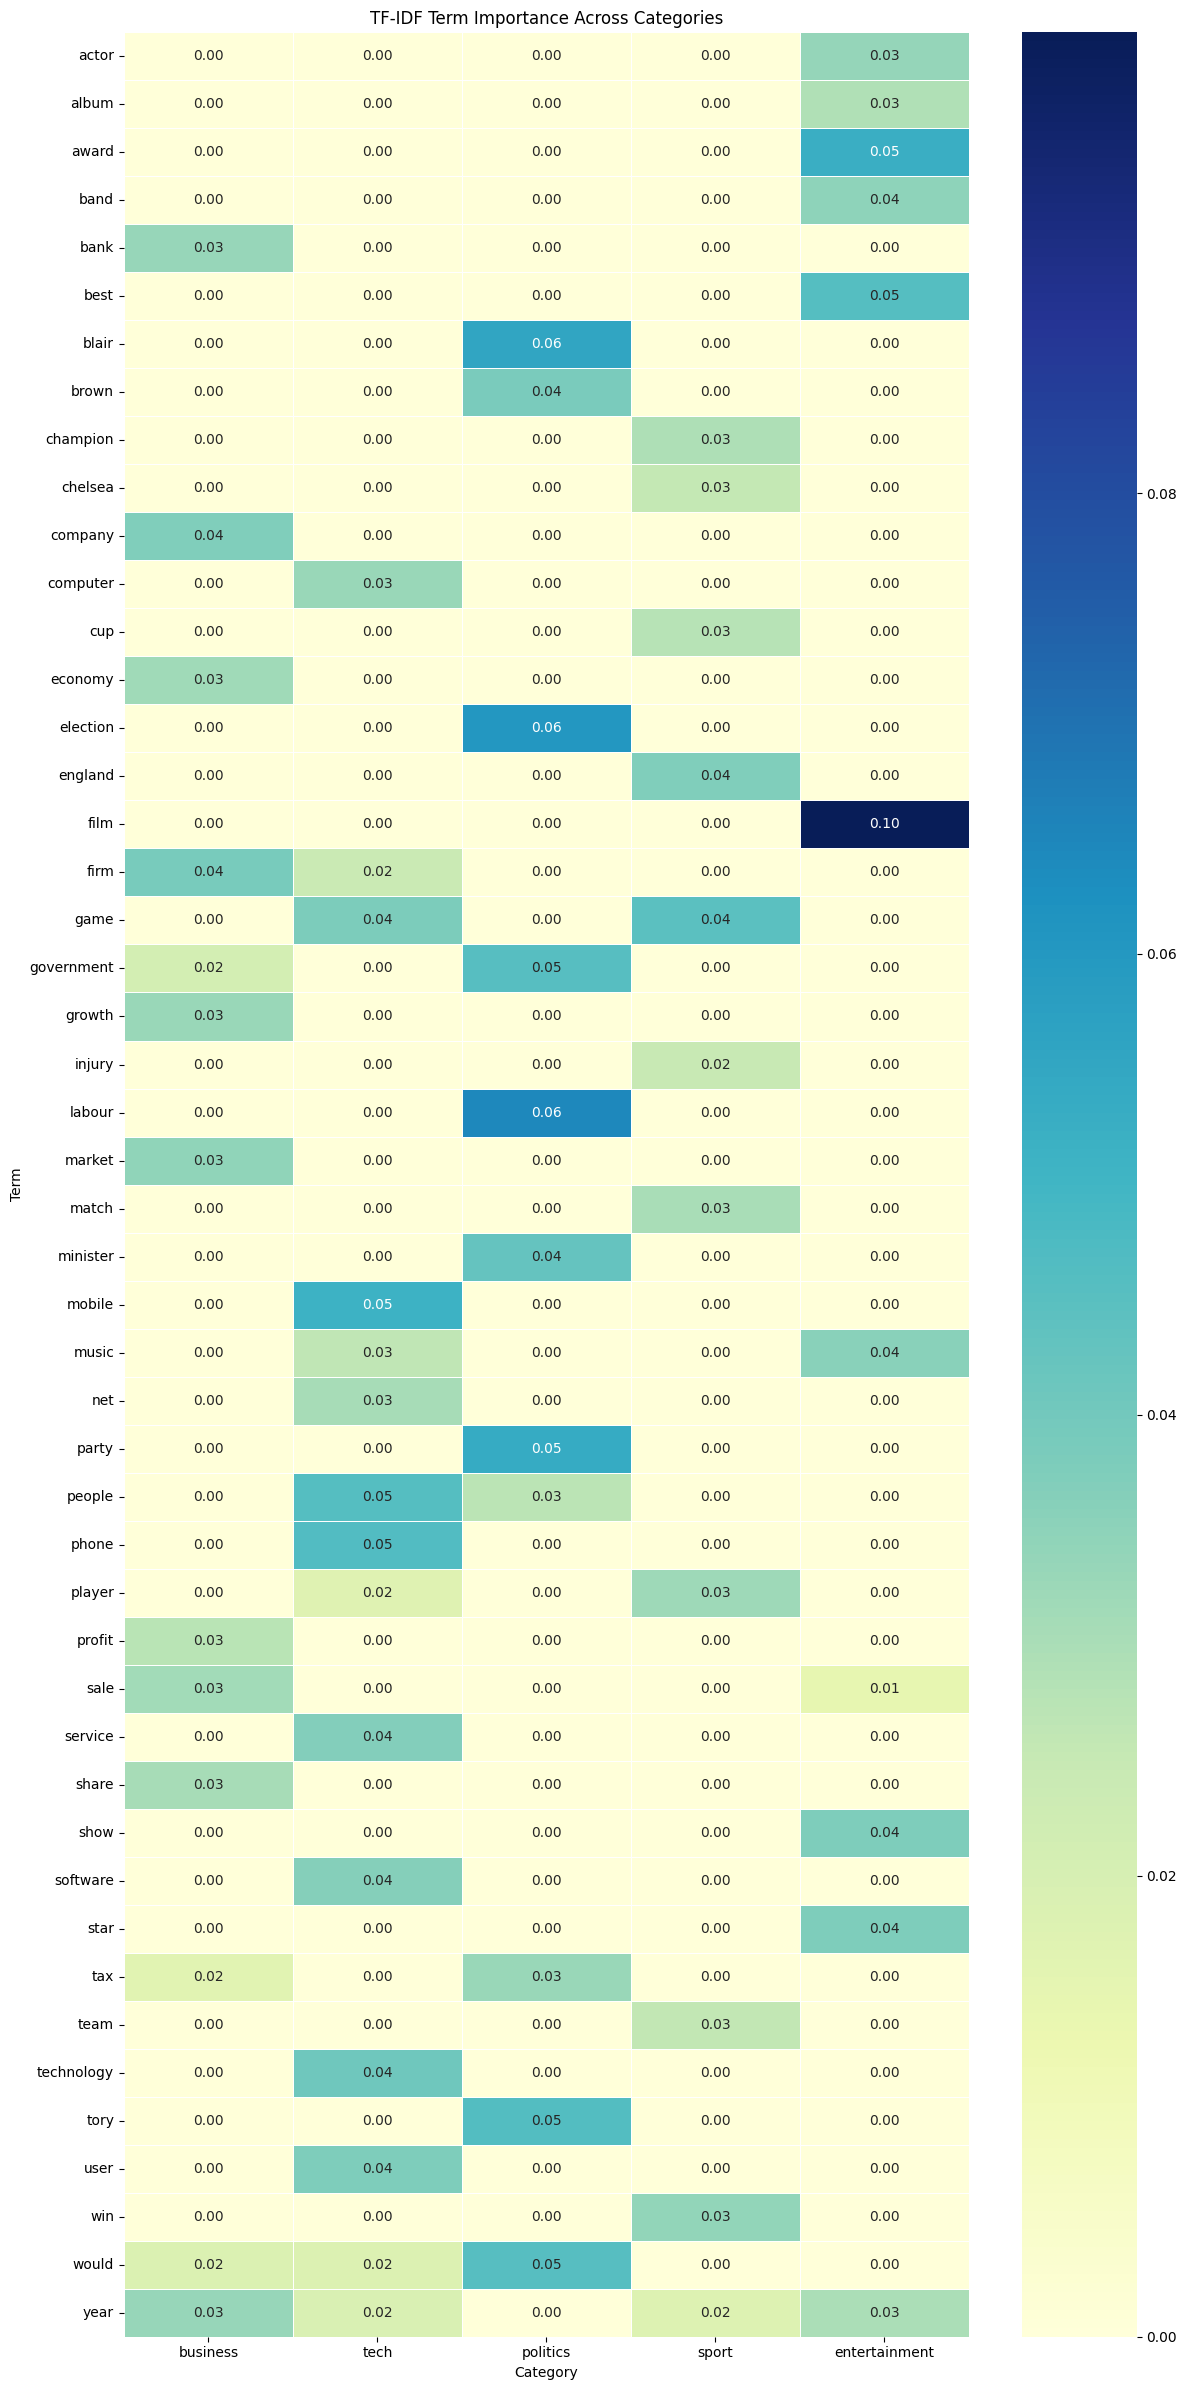

In [ ]:
# Analyze most important terms per category
def get_top_tfidf_terms(category, n_terms=10):
    """
    Get top TF-IDF terms for a specific category

    💡 TIP: This function should:
    - Filter data for the specific category
    - Calculate mean TF-IDF scores for each term
    - Return top N terms with highest scores
    """
    # 🚀 YOUR CODE HERE: Implement category-specific TF-IDF analysis
    category_data = tfidf_df[tfidf_df['category'] == category]

    # Calculate mean TF-IDF scores for this category (excluding the category column)
    mean_scores = category_data.drop('category', axis=1).mean().sort_values(ascending=False)

    return mean_scores.head(n_terms)

# Analyze top terms for each category
print("🏷️ TOP TF-IDF TERMS BY CATEGORY")
print("=" * 50)

categories = df['Category'].unique()
category_terms = {}

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=10)
    category_terms[category] = top_terms

    print(f"\n📰 {category.upper()}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")

# 💡 STUDENT TASK: Create visualizations for TF-IDF analysis
# - Word clouds for each category
# - Bar charts of top terms
# - Heatmap of term importance across categories
from wordcloud import WordCloud

print("\n WORD CLOUDS BY CATEGORY")
print("=" * 50)

for category, top_terms in category_terms.items():
    wordcloud = WordCloud(width=600, height=400, background_color='white')
    wordcloud.generate_from_frequencies(top_terms.to_dict())

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - {category}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# - Bar charts of top terms
print("\n BAR CHARTS OF TOP TERMS")
print("=" * 50)

for category, top_terms in category_terms.items():
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
    plt.title(f"Top TF-IDF Terms - {category}")
    plt.xlabel('Mean TF-IDF Score')
    plt.tight_layout()
    plt.show()

# - Heatmap of term importance across categories
print("\n HEATMAP OF TERM IMPORTANCE")
print("=" * 50)

# Combine all top terms across categories
all_top_terms = set()
for terms in category_terms.values():
    all_top_terms.update(terms.index)

# Build a DataFrame of mean TF-IDF scores
heatmap_df = pd.DataFrame(index=sorted(all_top_terms), columns=categories)

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=len(all_top_terms))
    for term in all_top_terms:
        heatmap_df.loc[term, category] = top_terms.get(term, 0.0)

# Convert to numeric
heatmap_df = heatmap_df.astype(float)

# Plot heatmap
plt.figure(figsize=(12, len(all_top_terms)//2))
sns.heatmap(heatmap_df, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('TF-IDF Term Importance Across Categories')
plt.xlabel('Category')
plt.ylabel('Term')
plt.tight_layout()
plt.show()

## 🏷️ Part-of-Speech Analysis

### 🎯 Module 4: Grammatical Pattern Analysis

Let's analyze the grammatical patterns in different news categories using Part-of-Speech (POS) tagging. This can reveal interesting differences in writing styles between categories.

**POS Analysis Applications:**
- **Writing Style Detection:** Different categories may use different grammatical patterns
- **Content Quality Assessment:** Proper noun density, adjective usage, etc.
- **Feature Engineering:** POS tags can be features for classification

**💡 Hypothesis:** Sports articles might have more action verbs, while business articles might have more numbers and proper nouns.

In [ ]:
def analyze_pos_patterns(text):
    """
    Analyze POS patterns in text

    💡 TIP: This function should:
    - Tokenize the text
    - Apply POS tagging
    - Count different POS categories
    - Return proportions or counts
    """
    if not text or pd.isna(text):
        return {}

    # 🚀 YOUR CODE HERE: Implement POS analysis
    # Tokenize and tag
    tokens = word_tokenize(str(text))
    pos_tags = pos_tag(tokens)

    # Count POS categories
    pos_counts = Counter([tag for word, tag in pos_tags])
    total_words = len(pos_tags)

    if total_words == 0:
        return {}

    # Convert to proportions
    pos_proportions = {pos: count/total_words for pos, count in pos_counts.items()}

    return pos_proportions

# Apply POS analysis to all articles
print("🏷️ Analyzing POS patterns...")

pos_results = []
for idx, row in df.iterrows():
    pos_analysis = analyze_pos_patterns(row['full_text'])
    pos_analysis['category'] = row['Category']
    pos_analysis['article_id'] = row['ArticleId']
    pos_results.append(pos_analysis)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_results).fillna(0)

print(f"✅ POS analysis complete!")
print(f"📊 Found {len(pos_df.columns)-2} different POS tags")

# Show sample results
print("\n📝 Sample POS analysis:")
print(pos_df.head())

🏷️ Analyzing POS patterns...
✅ POS analysis complete!
📊 Found 43 different POS tags

📝 Sample POS analysis:
         JJ       NNS        NN       VBG        IN        DT       VBP  \
0  0.088608  0.113924  0.231013  0.025316  0.110759  0.066456  0.015823   
1  0.119883  0.070175  0.233918  0.032164  0.134503  0.081871  0.014620   
2  0.079044  0.079044  0.200368  0.025735  0.119485  0.095588  0.016544   
3  0.083582  0.107463  0.156716  0.022388  0.122388  0.062687  0.041791   
4  0.089005  0.078534  0.212042  0.028796  0.123037  0.102094  0.015707   

        VBN      PRP$         .  ...   FW  SYM  WP$  NNP  NNPS  POS   UH    #  \
0  0.041139  0.012658  0.037975  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1  0.029240  0.005848  0.040936  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2  0.029412  0.016544  0.040441  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3  0.017910  0.013433  0.046269  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4  0.026178  0.015707  0.041885  ...

📊 POS PATTERNS BY CATEGORY

🎯 Key POS patterns by category:
                   NN     NNS     NNP    NNPS      VB     VBD     VBG     VBN  \
category                                                                        
business       0.2241  0.0736  0.0011  0.0000  0.0333  0.0410  0.0200  0.0277   
entertainment  0.2454  0.0574  0.0008  0.0000  0.0281  0.0462  0.0194  0.0295   
politics       0.2087  0.0679  0.0007  0.0003  0.0455  0.0462  0.0209  0.0302   
sport          0.2184  0.0479  0.0005  0.0000  0.0408  0.0457  0.0175  0.0247   
tech           0.1932  0.0855  0.0006  0.0000  0.0420  0.0299  0.0236  0.0270   

                  VBP     VBZ      JJ     JJR     JJS      RB     RBR     RBS  \
category                                                                        
business       0.0158  0.0241  0.0920  0.0045  0.0033  0.0276  0.0018  0.0006   
entertainment  0.0179  0.0223  0.0939  0.0024  0.0050  0.0286  0.0010  0.0010   
politics       0.0199  0.0224  0.0901  0.0032  0

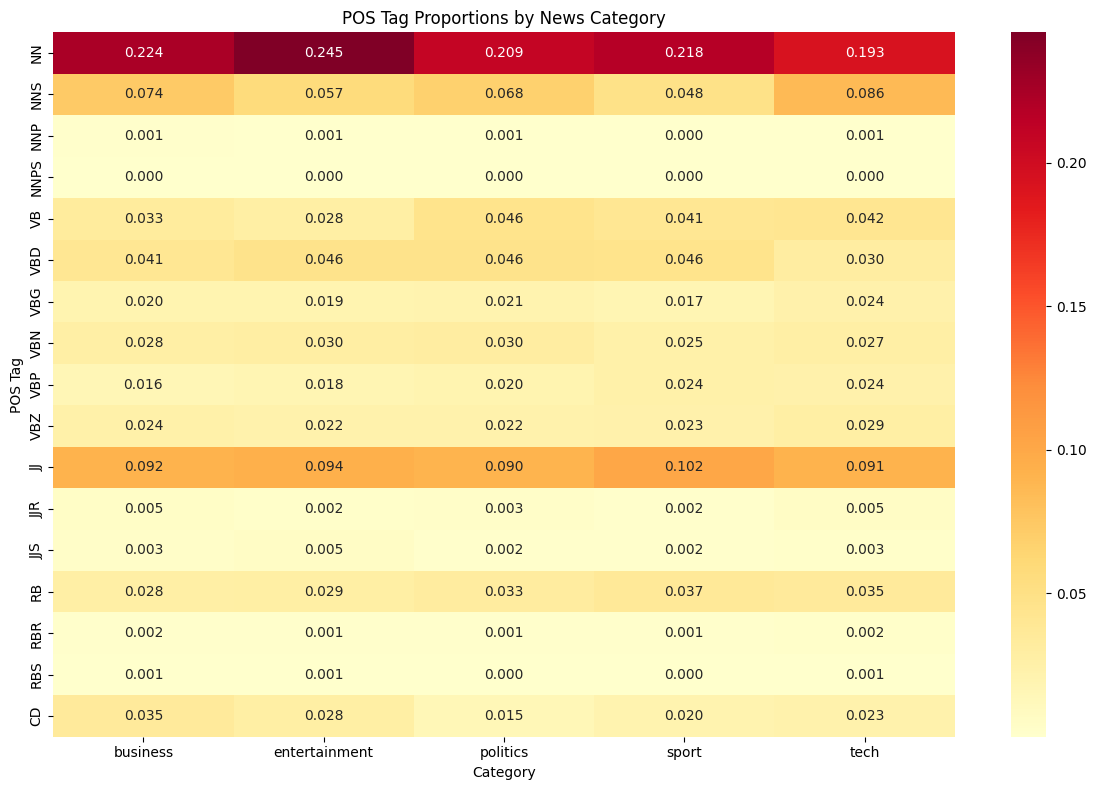

📌 Highest proper noun usage: business (0.0011)
📌 Highest action verb usage: politics (0.1126)
📌 Highest adjective usage: sport (0.1015)
📌 Lowest adjective usage: politics (0.0901)

💡 ANALYSIS QUESTIONS:
1. Which category has the highest proportion of proper nouns (NNP/NNPS)?
2. Which category uses the most action verbs (VB, VBD, VBG)?
3. Are there interesting patterns in adjective (JJ) usage?
4. How does number (CD) usage vary across categories?


In [ ]:
# Analyze POS patterns by category
print("📊 POS PATTERNS BY CATEGORY")
print("=" * 50)

# Group by category and calculate mean proportions
pos_by_category = pos_df.groupby('category').mean()

# Focus on major POS categories
major_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
             'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'CD']

# Filter to only include major POS tags that exist in our data
available_pos = [pos for pos in major_pos if pos in pos_by_category.columns]

if available_pos:
    pos_summary = pos_by_category[available_pos]

    print("\n🎯 Key POS patterns by category:")
    print(pos_summary.round(4))

    # Create visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(pos_summary.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('POS Tag Proportions by News Category')
    plt.xlabel('Category')
    plt.ylabel('POS Tag')
    plt.tight_layout()
    plt.show()

    # 💡 STUDENT TASK: Analyze the patterns
    # - Which categories use more nouns vs verbs?

    pos_summary['ProperNouns'] = pos_summary.get('NNP', 0) + pos_summary.get('NNPS', 0)

    highest_proper_nouns = pos_summary['ProperNouns'].idxmax()
    print(f"📌 Highest proper noun usage: {highest_proper_nouns} ({pos_summary['ProperNouns'].max():.4f})")

    # - Do business articles have more numbers (CD)?

    pos_summary['ActionVerbs'] = pos_summary.get('VB', 0) + pos_summary.get('VBD', 0) + pos_summary.get('VBG', 0)

    highest_action_verbs = pos_summary['ActionVerbs'].idxmax()
    print(f"📌 Highest action verb usage: {highest_action_verbs} ({pos_summary['ActionVerbs'].max():.4f})")

    # - Are there differences in adjective usage?
    highest_adj = pos_summary['JJ'].idxmax()
    lowest_adj = pos_summary['JJ'].idxmin()
    print(f"📌 Highest adjective usage: {highest_adj} ({pos_summary['JJ'].max():.4f})")
    print(f"📌 Lowest adjective usage: {lowest_adj} ({pos_summary['JJ'].min():.4f})")


    print("\n💡 ANALYSIS QUESTIONS:")
    print("1. Which category has the highest proportion of proper nouns (NNP/NNPS)?")
    print("2. Which category uses the most action verbs (VB, VBD, VBG)?")
    print("3. Are there interesting patterns in adjective (JJ) usage?")
    print("4. How does number (CD) usage vary across categories?")
else:
    print("⚠️ No major POS tags found in the analysis. Check your POS tagging implementation.")



## 🌳 Syntax Parsing and Semantic Analysis

### 🎯 Module 5: Understanding Sentence Structure

Now we'll use spaCy to perform dependency parsing and extract semantic relationships from our news articles. This helps us understand not just what words are present, but how they relate to each other.

**Dependency Parsing Applications:**
- **Relationship Extraction:** Find connections between entities
- **Event Detection:** Identify who did what to whom
- **Information Extraction:** Extract structured facts from unstructured text

**💡 Business Value:** Understanding sentence structure helps extract more precise information about events, relationships, and actions mentioned in news articles.

In [ ]:
def extract_syntactic_features(text):
    """
    Extract syntactic features using spaCy dependency parsing

    💡 TIP: This function should extract:
    - Dependency relations
    - Subject-verb-object patterns
    - Noun phrases
    - Verb phrases
    """
    if not text or pd.isna(text):
        return {}

    # Process text with spaCy
    doc = nlp(str(text))

    features = {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'dependency_relations': [],
        'noun_phrases': [],
        'verb_phrases': [],
        'subjects': [],
        'objects': []
    }

    # 🚀 YOUR CODE HERE: Extract syntactic features

    # Extract dependency relations
    for token in doc:
        if not token.is_space and not token.is_punct:
            features['dependency_relations'].append(token.dep_)

    # Extract noun phrases
    for chunk in doc.noun_chunks:
        features['noun_phrases'].append(chunk.text.lower())

    # Extract subjects and objects
    for token in doc:
        if token.dep_ in ['nsubj', 'nsubjpass']:  # Subjects
            features['subjects'].append(token.text.lower())
        elif token.dep_ in ['dobj', 'iobj', 'pobj']:  # Objects
            features['objects'].append(token.text.lower())

    # Count dependency types
    dep_counts = Counter(features['dependency_relations'])
    features['dependency_counts'] = dict(dep_counts)

    return features

# Apply syntactic analysis to sample articles
print("🌳 Performing syntactic analysis...")

# Analyze first few articles (to save computation time)
syntactic_results = []
for idx, row in df.head(5).iterrows():  # Limit to first 5 for demo
    features = extract_syntactic_features(row['full_text'])
    features['category'] = row['Category']
    features['article_id'] = row['ArticleId']
    syntactic_results.append(features)

print("✅ Syntactic analysis complete!")

# Display results
for i, result in enumerate(syntactic_results):
    print(f"\n📰 Article {i+1} ({result['category']}):")
    print(f"  Sentences: {result['num_sentences']}")
    print(f"  Tokens: {result['num_tokens']}")
    print(f"  Noun phrases: {result['noun_phrases'][:3]}...")  # Show first 3
    print(f"  Subjects: {result['subjects'][:3]}...")  # Show first 3
    print(f"  Objects: {result['objects'][:3]}...")  # Show first 3

🌳 Performing syntactic analysis...
✅ Syntactic analysis complete!

📰 Article 1 (business):
  Sentences: 15
  Tokens: 346
  Noun phrases: ['-', 'boss', 'defence lawyers']...
  Subjects: ['-', 'boss', 'worldcom']...
  Objects: ['lawyers', 'ebbers', 'battery']...

📰 Article 2 (business):
  Sentences: 15
  Tokens: 368
  Noun phrases: ['german business confidence', 'german business confidence', 'february']...
  Subjects: ['confidence', 'ifo', 'index']...
  Objects: ['confidence', 'february', 'hopes']...

📰 Article 3 (business):
  Sentences: 24
  Tokens: 587
  Noun phrases: ['bbc poll', 'economic gloom citizens', 'a majority']...
  Subjects: ['poll', 'citizens', 'economy']...
  Objects: ['majority', 'nations', 'poll']...

📰 Article 4 (tech):
  Sentences: 31
  Tokens: 724
  Noun phrases: ['lifestyle', 'mobile choice', 'faster  better or funkier hardware']...
  Subjects: ['lifestyle', 'governs', 'firms']...
  Objects: ['choice', 'hardware', 'research']...

📰 Article 5 (business):
  Sentences: 

📝 Sample sentence: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used b


🧠 Syntactic Complexity by Category
               avg_sentence_length  avg_doc_length
business                     24.99          385.78
tech                         24.17          576.09
politics                     25.23          511.46
sport                        22.18          392.37
entertainment                24.14          385.82


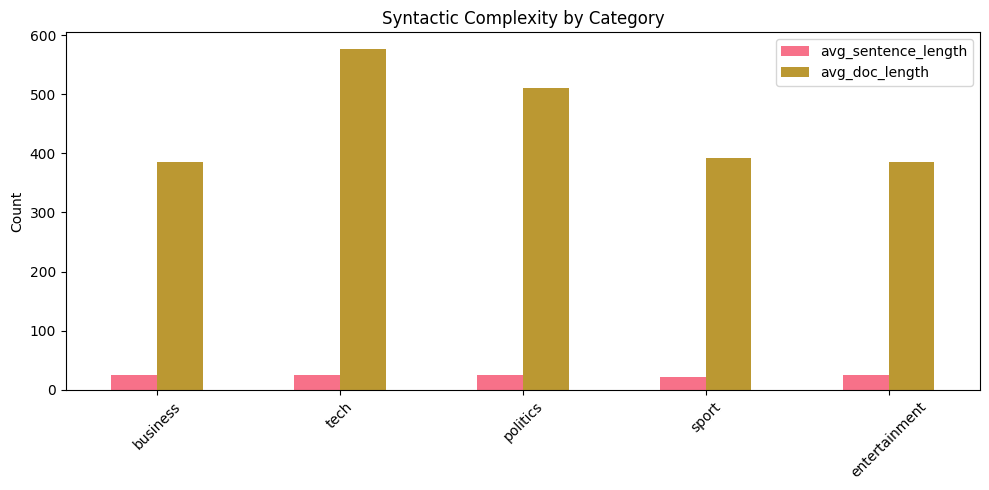


🧩 Sample Subject-Verb-Object (SVO) Patterns:

Article 1 - Category: business
  - ➝ launches ➝ lawyers
  boss ➝ launches ➝ lawyers
  s ➝ alerted ➝ directors
  warnings ➝ led ➝ 
  ebbers ➝ pleaded ➝ 
  lawyers ➝ argued ➝ 
  ebbers ➝ orchestrated ➝ series
  cooper ➝ told ➝ jury
  who ➝ runs ➝ business
  andersen ➝ approved ➝ accounting
  she ➝ said ➝ 
  andersen ➝ given ➝ light
  lawyers ➝ said ➝ 
  auditors ➝ alert ➝ him
  cooper ➝ said ➝ 
  ebbers ➝ passed ➝ questions
  witness ➝ said ➝ 
  sullivan ➝ said ➝ 
  ebbers ➝ ordered ➝ adjustments
  cooper ➝ said ➝ 
  sullivan ➝ mentioned ➝ anything
  ebbers ➝ face ➝ sentence
  he ➝ facing ➝ 
  worldcom ➝ emerged ➝ 
  mci ➝ agreed ➝ 

Article 2 - Category: business
  confidence ➝ slides ➝ confidence
  ifo ➝ said ➝ 
  index ➝ fell ➝ 
  study ➝ found ➝ 
  outlook ➝ worsened ➝ 
  observers ➝ hoping ➝ 
  sector ➝ signal ➝ 
  activity ➝ picking ➝ 
  we ➝ re ➝ 
  index ➝ taken ➝ 
  knock ➝ said ➝ 
  economy ➝ called ➝ dip
  he ➝ said ➝ 
  index ➝ r

In [ ]:
# Visualize dependency parsing for a sample sentence
from spacy import displacy

# Choose a sample sentence
sample_sentence = df.iloc[0]['Text']  # First article's content
print(f"📝 Sample sentence: {sample_sentence}")

# Process with spaCy
doc = nlp(sample_sentence)

# Display dependency tree (this works best in Jupyter)
print("\n🌳 Dependency Parse Visualization:")
try:
    # This will create an interactive visualization in Jupyter
    displacy.render(doc, style="dep", jupyter=True)
except:
    # Fallback: print dependency information
    print("\n🔗 Dependency Relations:")
    for token in doc:
        if not token.is_space and not token.is_punct:
            print(f"  {token.text} --> {token.dep_} --> {token.head.text}")

# 💡 STUDENT TASK: Extend syntactic analysis
# - Compare syntactic complexity across categories
from collections import defaultdict
import numpy as np

print("\n🧠 Syntactic Complexity by Category")
print("=" * 50)

complexity_data = defaultdict(lambda: {'sent_lengths': [], 'token_counts': []})

# Use 'Text' column for content
for _, row in df.iterrows():
    doc = nlp(row['Text'])
    cat = row['Category']

    sent_lengths = [len(sent) for sent in doc.sents]
    complexity_data[cat]['sent_lengths'].extend(sent_lengths)
    complexity_data[cat]['token_counts'].append(len(doc))

# Convert to DataFrame for visualization
complexity_df = pd.DataFrame({
    cat: {
        'avg_sentence_length': np.mean(vals['sent_lengths']),
        'avg_doc_length': np.mean(vals['token_counts']),
    } for cat, vals in complexity_data.items()
}).T

print(complexity_df.round(2))

# Visualize
complexity_df.plot(kind='bar', figsize=(10, 5), title='Syntactic Complexity by Category')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# - Extract action patterns (who did what)
def extract_svo(doc):
    svos = []
    for token in doc:
        if token.dep_ in ('nsubj', 'nsubjpass') and token.head.pos_ == 'VERB':
            subject = token.text
            verb = token.head.text
            # Try to find the object of the verb
            obj = ''
            for child in token.head.children:
                if child.dep_ in ('dobj', 'pobj', 'attr'):
                    obj = child.text
            svos.append((subject, verb, obj))
    return svos

# Example: extract from a few samples
print("\n🧩 Sample Subject-Verb-Object (SVO) Patterns:")
# Use 'Text' column for content
for i in range(3):
    doc = nlp(df.iloc[i]['Text'])
    svos = extract_svo(doc)
    print(f"\nArticle {i+1} - Category: {df.iloc[i]['Category']}")
    for s, v, o in svos:
        print(f"  {s} ➝ {v} ➝ {o}")

# - Identify most common dependency relations per category
from collections import Counter

print("\n🔗 Top Dependency Relations per Category")
print("=" * 50)

dep_relations = defaultdict(list)

# Use 'Text' column for content
for _, row in df.iterrows():
    doc = nlp(row['Text'])
    cat = row['Category']
    dep_relations[cat].extend([token.dep_ for token in doc if not token.is_punct])

# Count top dependencies
for cat, deps in dep_relations.items():
    print(f"\n📂 Category: {cat}")
    top_deps = Counter(deps).most_common(10)
    for dep, count in top_deps:
        print(f"  {dep}: {count}")

# - Create features for classification based on syntax
# Add syntactic features to dataframe
# Use 'Text' column for content
df['nsubj_count'] = df['Text'].apply(lambda x: len([t for t in nlp(x) if t.dep_ == 'nsubj']))
df['verb_count'] = df['Text'].apply(lambda x: len([t for t in nlp(x) if t.pos_ == 'VERB']))
df['avg_sentence_length'] = df['Text'].apply(lambda x: np.mean([len(sent) for sent in nlp(x).sents]))

# Show example
print("\n🔍 Sample syntactic features:")
print(df[['Category', 'nsubj_count', 'verb_count', 'avg_sentence_length']].head())

## 😊 Sentiment and Emotion Analysis

### 🎯 Module 6: Understanding Emotional Tone

Let's analyze the sentiment and emotional tone of our news articles. This can reveal interesting patterns about how different types of news are presented and perceived.

**Sentiment Analysis Applications:**
- **Media Bias Detection:** Identify emotional slant in news coverage
- **Public Opinion Tracking:** Monitor sentiment trends over time
- **Content Recommendation:** Suggest articles based on emotional tone

**💡 Hypothesis:** Different news categories might have different emotional profiles - sports might be more positive, politics more negative, etc.

In [ ]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze sentiment using VADER sentiment analyzer

    💡 TIP: VADER returns:
    - compound: overall sentiment (-1 to 1)
    - pos: positive score (0 to 1)
    - neu: neutral score (0 to 1)
    - neg: negative score (0 to 1)
    """
    if not text or pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0}

    # 🚀 YOUR CODE HERE: Implement sentiment analysis
    scores = sia.polarity_scores(str(text))

    # Add interpretation
    if scores['compound'] >= 0.05:
        scores['sentiment_label'] = 'positive'
    elif scores['compound'] <= -0.05:
        scores['sentiment_label'] = 'negative'
    else:
        scores['sentiment_label'] = 'neutral'

    return scores

# Apply sentiment analysis to all articles
print("😊 Analyzing sentiment...")

sentiment_results = []
for idx, row in df.iterrows():
    # Analyze both title and content
    full_sentiment = analyze_sentiment(row['Text'])

    result = {
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'full_sentiment': full_sentiment['compound'],
        'full_label': full_sentiment['sentiment_label'],
        'pos_score': full_sentiment['pos'],
        'neu_score': full_sentiment['neu'],
        'neg_score': full_sentiment['neg']
    }
    sentiment_results.append(result)

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis complete!")
print(f"📊 Analyzed {len(sentiment_df)} articles")

# Display sample results
print("\n📝 Sample sentiment results:")
print(sentiment_df[['category', 'full_sentiment', 'full_label']].head())

😊 Analyzing sentiment...
✅ Sentiment analysis complete!
📊 Analyzed 1490 articles

📝 Sample sentiment results:
   category  full_sentiment full_label
0  business         -0.9701   negative
1  business          0.7623   positive
2  business         -0.9318   negative
3      tech          0.9554   positive
4  business         -0.9486   negative


 SENTIMENT ANALYSIS BY CATEGORY

 Sentiment statistics by category:
              full_sentiment                         pos_score neu_score  \
                        mean     std     min     max      mean      mean   
category                                                                   
business              0.2404  0.8370 -0.9985  0.9995    0.0926    0.8370   
entertainment         0.5991  0.6796 -0.9978  0.9999    0.1356    0.8107   
politics              0.0578  0.8811 -0.9984  0.9999    0.0947    0.8184   
sport                 0.5541  0.7244 -0.9967  0.9996    0.1360    0.7933   
tech                  0.5233  0.7557 -0.9991  0.9993    0.0895    0.8598   

              neg_score  
                   mean  
category                 
business         0.0704  
entertainment    0.0537  
politics         0.0869  
sport            0.0707  
tech             0.0507  

 Sentiment distribution (%) by category:
full_label     negative  neutral  positive
category                      

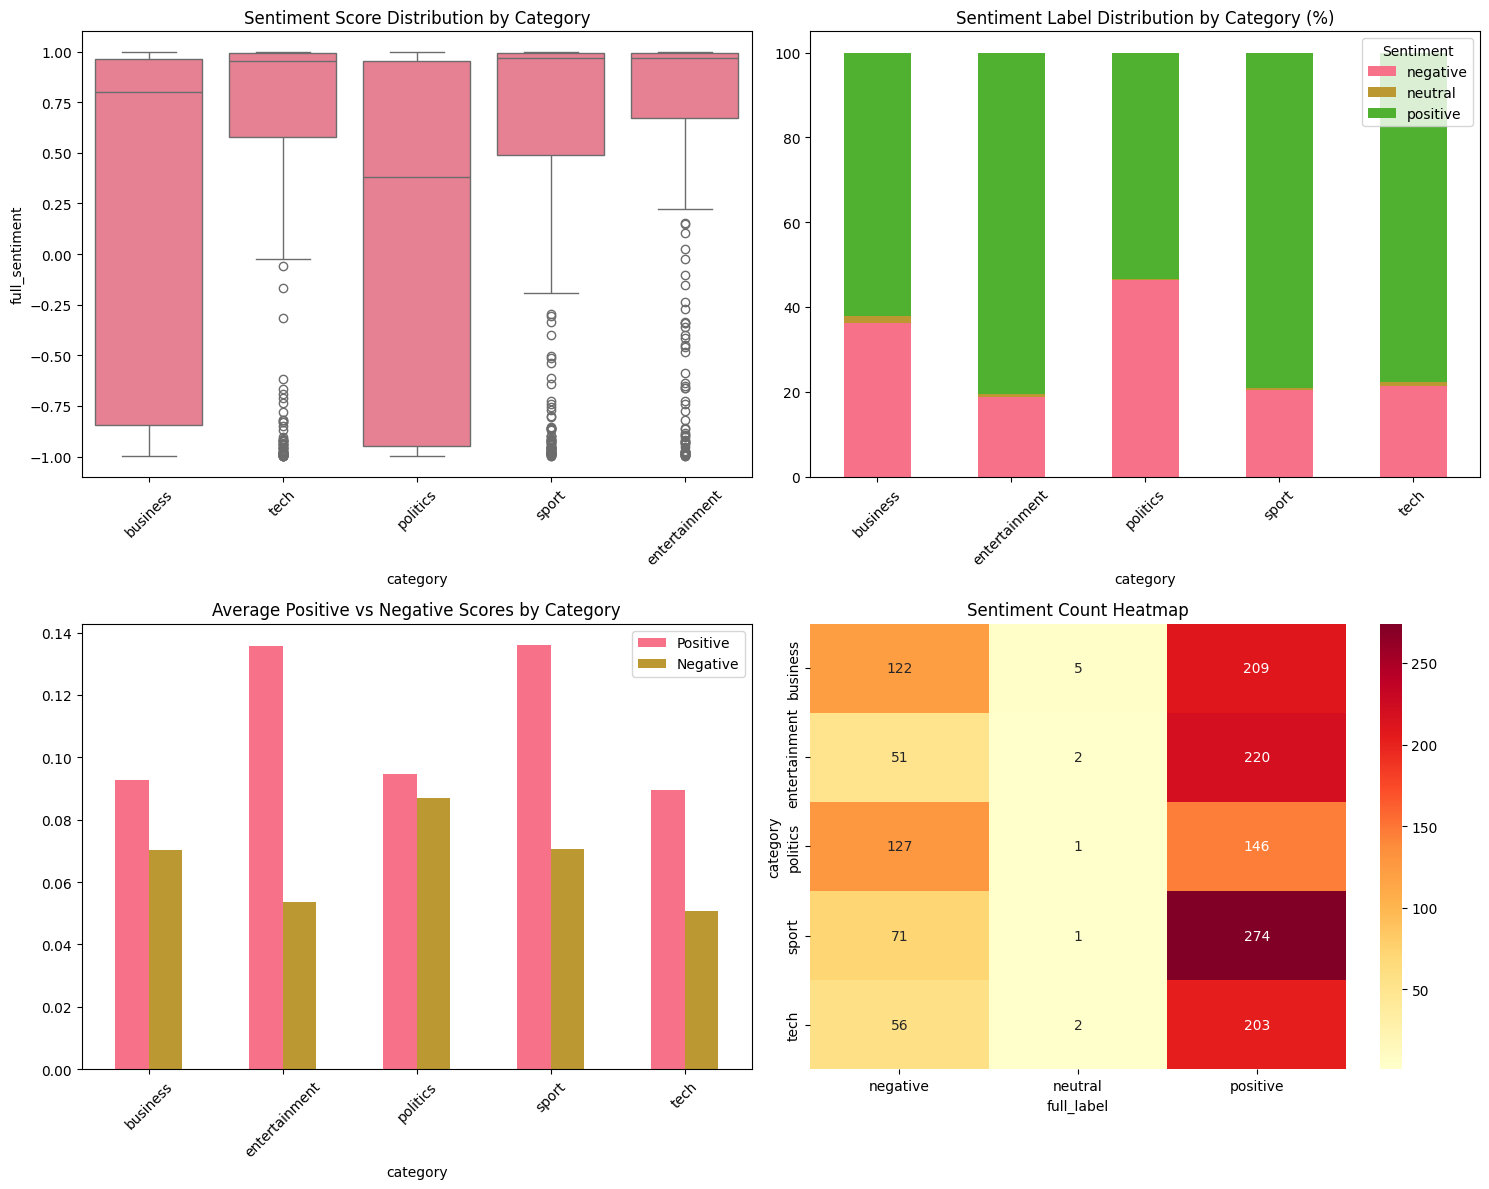


 Most positive category: entertainment (0.5991)
 Most negative category: politics (0.0578)
'title_sentiment' and 'content_sentiment' columns not found. Skipping comparison.

 Sentiment variability (std) by category:
category
politics         0.8811
business         0.8370
tech             0.7557
sport            0.7244
entertainment    0.6796
Name: std, dtype: float64


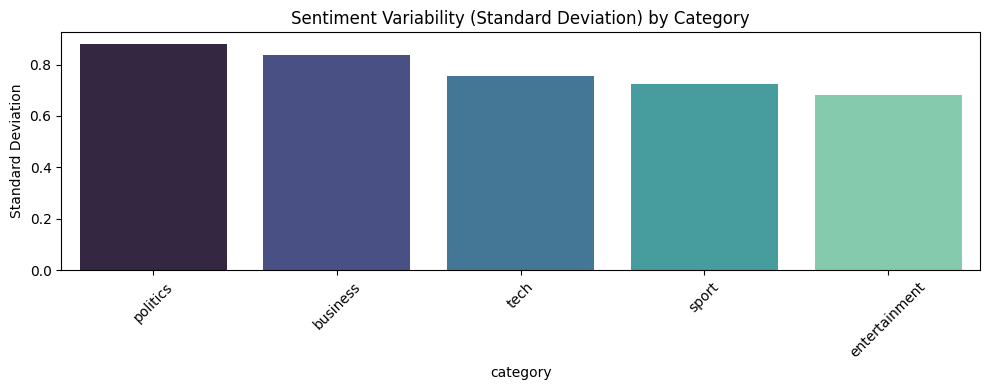


 Sentiment-based features sample:
   full_sentiment  pos_score  neg_score  neu_score  sentiment_encoded
0         -0.9701      0.063      0.144      0.793                  0
1          0.7623      0.117      0.096      0.786                  2
2         -0.9318      0.083      0.108      0.809                  0
3          0.9554      0.058      0.026      0.916                  2
4         -0.9486      0.078      0.115      0.807                  0


In [ ]:
# Analyze sentiment patterns by category
print(" SENTIMENT ANALYSIS BY CATEGORY")
print("=" * 50)

# Calculate sentiment statistics by category
sentiment_by_category = sentiment_df.groupby('category').agg({
    'full_sentiment': ['mean', 'std', 'min', 'max'],
    'pos_score': 'mean',
    'neu_score': 'mean',
    'neg_score': 'mean'
}).round(4)

print("\n Sentiment statistics by category:")
print(sentiment_by_category)

# Sentiment distribution by category
sentiment_dist = sentiment_df.groupby(['category', 'full_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

print("\n Sentiment distribution (%) by category:")
print(sentiment_dist_pct.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment scores by category
sns.boxplot(data=sentiment_df, x='category', y='full_sentiment', ax=axes[0,0])
axes[0,0].set_title('Sentiment Score Distribution by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sentiment label distribution
sentiment_dist_pct.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Sentiment Label Distribution by Category (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment')

# 3. Positive vs Negative scores
category_means = sentiment_df.groupby('category')[['pos_score', 'neg_score']].mean()
category_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Positive vs Negative Scores by Category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['Positive', 'Negative'])

# 4. Sentiment vs Category heatmap
sentiment_pivot = sentiment_df.pivot_table(values='full_sentiment', index='category',
                                         columns='full_label', aggfunc='count', fill_value=0)
sns.heatmap(sentiment_pivot, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Sentiment Count Heatmap')

plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Analyze sentiment patterns
# - Which categories are most positive/negative?

most_positive = sentiment_by_category['full_sentiment']['mean'].idxmax()
most_negative = sentiment_by_category['full_sentiment']['mean'].idxmin()

print(f"\n Most positive category: {most_positive} "
      f"({sentiment_by_category['full_sentiment']['mean'].max():.4f})")

print(f" Most negative category: {most_negative} "
      f"({sentiment_by_category['full_sentiment']['mean'].min():.4f})")

# - Are there differences between title and content sentiment?

if 'title_sentiment' in sentiment_df.columns and 'content_sentiment' in sentiment_df.columns:
    sentiment_df['sentiment_diff'] = sentiment_df['title_sentiment'] - sentiment_df['content_sentiment']

    diff_by_category = sentiment_df.groupby('category')['sentiment_diff'].mean().sort_values()
    print("\n Title vs Content Sentiment Difference (avg):")
    print(diff_by_category.round(4))

    # Visualize
    plt.figure(figsize=(10, 5))
    sns.barplot(x=diff_by_category.index, y=diff_by_category.values, palette='coolwarm')
    plt.title('Average Sentiment Difference (Title - Content) by Category')
    plt.ylabel('Avg Sentiment Difference')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("'title_sentiment' and 'content_sentiment' columns not found. Skipping comparison.")

# - How does sentiment vary within categories?

variability = sentiment_by_category['full_sentiment']['std'].sort_values(ascending=False)
print("\n Sentiment variability (std) by category:")
print(variability.round(4))

# Visualize
plt.figure(figsize=(10, 4))
sns.barplot(x=variability.index, y=variability.values, palette='mako')
plt.title('Sentiment Variability (Standard Deviation) by Category')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# - Can sentiment be used as a feature for classification?
# Example: Encoding sentiment label as a numeric feature
from sklearn.preprocessing import LabelEncoder

sentiment_df['sentiment_encoded'] = LabelEncoder().fit_transform(sentiment_df['full_label'])

# Example features for model training
features = sentiment_df[['full_sentiment', 'pos_score', 'neg_score', 'neu_score', 'sentiment_encoded']]
target = sentiment_df['category']  # or a simplified label version

print("\n Sentiment-based features sample:")
print(features.head())


## 🏷️ Text Classification System

### 🎯 Module 7: Building the News Classifier

Now we'll build the core of our NewsBot system - a multi-class text classifier that can automatically categorize news articles. We'll compare different algorithms and evaluate their performance.

**Classification Pipeline:**
1. **Feature Engineering:** Combine TF-IDF with other features
2. **Model Training:** Train multiple algorithms
3. **Model Evaluation:** Compare performance metrics
4. **Model Selection:** Choose the best performing model

**💡 Business Impact:** Accurate classification enables automatic content routing, personalized recommendations, and efficient content management.

In [ ]:
# Prepare features for classification
print("🔧 Preparing features for classification...")

# 💡 TIP: Combine multiple feature types for better performance
# - TF-IDF features (most important)
# - Sentiment features
# - Text length features
# - POS features (if available)

# Create feature matrix
X_tfidf = tfidf_matrix.toarray()  # TF-IDF features

# Add sentiment features
sentiment_features = sentiment_df[['full_sentiment', 'pos_score', 'neu_score', 'neg_score']].values

# Add text length features
length_features = np.array([
    df['full_text'].str.len(),  # Character length
    df['full_text'].str.split().str.len(),  # Word count
    df['Text'].str.len(),  # Use 'Text' column for length
]).T

# 🚀 YOUR CODE HERE: Combine all features
X_combined = np.hstack([
    X_tfidf,
    sentiment_features,
    length_features
])

# Target variable
y = df['Category'].values

print(f"✅ Feature matrix prepared!")
print(f"📊 Feature matrix shape: {X_combined.shape}")
print(f"🎯 Number of classes: {len(np.unique(y))}")
print(f"📋 Classes: {np.unique(y)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📈 Data split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

🔧 Preparing features for classification...
✅ Feature matrix prepared!
📊 Feature matrix shape: (1490, 5007)
🎯 Number of classes: 5
📋 Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']

📈 Data split:
  Training set: 1192 samples
  Test set: 298 samples


In [ ]:
# Train and evaluate multiple classifiers
print("🤖 Training multiple classifiers...")

# Define classifiers to compare
classifiers = {
    # 'Naive Bayes': MultinomialNB(), # Removed due to negative feature values
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)  # Enable probability for better analysis
}

# 💡 TIP: For larger datasets, you might want to use SGDClassifier for efficiency
# from sklearn.linear_model import SGDClassifier
# classifiers['SGD'] = SGDClassifier(random_state=42)

# Train and evaluate each classifier
results = {}
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # 🚀 YOUR CODE HERE: Train and evaluate classifier
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test) if hasattr(classifier, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = classifier

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n🏆 CLASSIFIER COMPARISON")
print("=" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

🤖 Training multiple classifiers...

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.6477
  📊 CV Score: 0.6879 (+/- 0.0749)

🔄 Training SVM...
  ✅ Accuracy: 0.3557
  📊 CV Score: 0.3574 (+/- 0.0385)

🏆 CLASSIFIER COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0  Logistic Regression         0.6477   0.6879  0.0375
1                  SVM         0.3557   0.3574  0.0193

🥇 Best performing model: Logistic Regression


📊 DETAILED EVALUATION: Logistic Regression

📋 Classification Report:
               precision    recall  f1-score   support

     business       0.56      0.78      0.65        67
entertainment       0.64      0.62      0.63        55
     politics       0.81      0.53      0.64        55
        sport       0.66      0.75      0.70        69
         tech       0.70      0.50      0.58        52

     accuracy                           0.65       298
    macro avg       0.67      0.64      0.64       298
 weighted avg       0.67      0.65      0.64       298



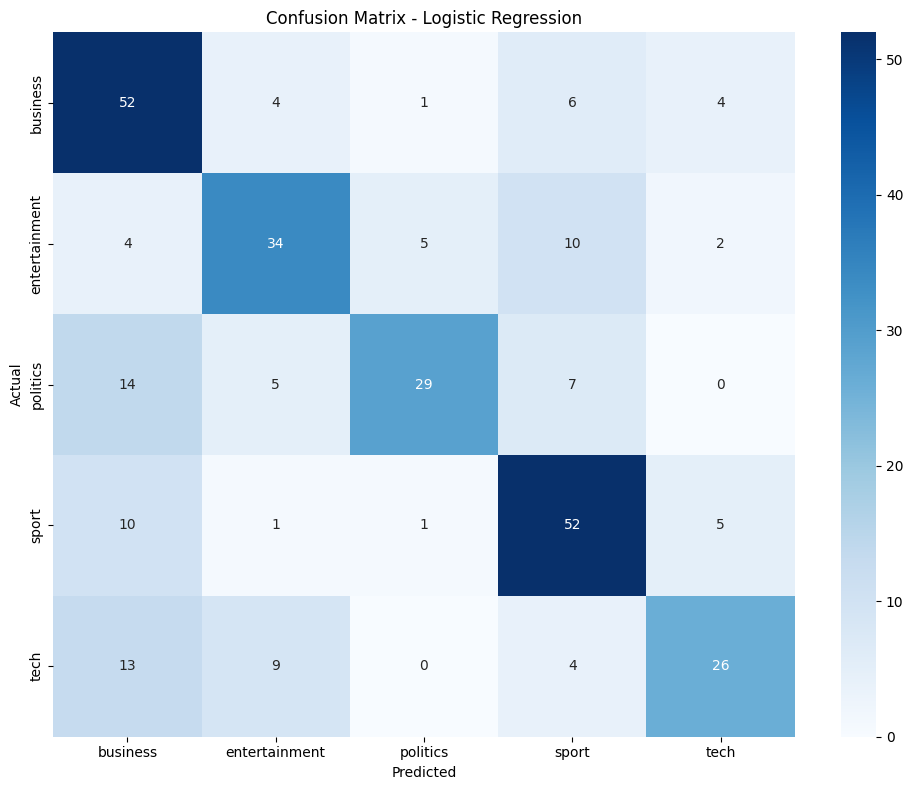


🔍 Top Features by Category:

📰 business:
  neu_score: 1.2011
  bank: 0.5178
  firm: 0.4793
  economy: 0.4787
  growth: 0.4641
  market: 0.4534
  company: 0.4288
  price: 0.4169
  share: 0.4142
  rate: 0.4051

📰 entertainment:
  film: 1.2550
  full_sentiment: 0.6684
  neu_score: 0.6389
  award: 0.6292
  best: 0.5202
  band: 0.4731
  star: 0.4526
  actor: 0.4473
  album: 0.4400
  show: 0.4246

📰 politics:
  labour: 0.8743
  election: 0.8027
  party: 0.7575
  blair: 0.7479
  tory: 0.5726
  minister: 0.4613
  brown: 0.4550
  government: 0.4322
  lord: 0.3597
  howard: 0.3593

📰 sport:
  neu_score: 0.7171
  england: 0.5518
  pos_score: 0.5031
  game: 0.4743
  champion: 0.4421
  match: 0.4251
  cup: 0.4088
  win: 0.3768
  player: 0.3713
  chelsea: 0.3701

📰 tech:
  mobile: 0.5932
  phone: 0.5040
  user: 0.4469
  technology: 0.4212
  software: 0.4186
  broadband: 0.4033
  computer: 0.3877
  microsoft: 0.3818
  net: 0.3630
  service: 0.3508

✅ Updated Feature matrix prepared with additional l

In [ ]:
# Detailed evaluation of the best model
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"📊 DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("\n🔍 Top Features by Category:")
    # Define feature names based on how X_combined was constructed in cell aEBTSpo6KioK
    # X_combined = np.hstack([X_tfidf, sentiment_features, length_features])
    # X_tfidf corresponds to feature_names from tfidf_vectorizer
    # sentiment_features corresponds to 'full_sentiment', 'pos_score', 'neu_score', 'neg_score'
    # length_features corresponds to char_length, word_count, and Text length (which is char_length again, let's use unique names)
    feature_names_sentiment = ['full_sentiment', 'pos_score', 'neu_score', 'neg_score']
    feature_names_length = ['char_length_full_text', 'word_count_full_text', 'char_length_text'] # Adjusted names

    feature_names_extended = list(feature_names) + feature_names_sentiment + feature_names_length


    classes = best_model.classes_
    coefficients = best_model.coef_

    for i, class_name in enumerate(classes):
        top_indices = np.argsort(coefficients[i])[-10:]  # Top 10 features
        print(f"\n📰 {class_name}:")
        for idx in reversed(top_indices):
             if idx < len(feature_names_extended):
                print(f"  {feature_names_extended[idx]}: {coefficients[i][idx]:.4f}")
             else:
                print(f"  Unknown Feature Index {idx}")


# 💡 STUDENT TASK: Improve the classifier
# - Try different feature combinations
# Example: Adding new features
# Removed lines trying to access non-existent 'title_sentiment' and 'content_sentiment'
# df['sentiment_diff'] = df['full_sentiment'] - df['sentiment_df']['content_sentiment'] # Corrected to use existing full_sentiment

# Update feature set - Reconstruct X_combined with potentially new features if added
# For now, just demonstrate how to add features if they existed
# Assuming 'avg_sentence_length' and 'nsubj_count', 'verb_count' were added to df earlier (they were in HtBAxkAnKioJ)
# Let's add them to the feature set

if 'avg_sentence_length' in df.columns and 'nsubj_count' in df.columns and 'verb_count' in df.columns:
    additional_linguistic_features = df[['avg_sentence_length', 'nsubj_count', 'verb_count']].values
    # Need to recreate X_combined including these.
    # Ensure the order matches the training data
    # Original: X_tfidf, sentiment_features, length_features
    # New: X_tfidf, sentiment_features, length_features, additional_linguistic_features

    # Recreate length_features to be consistent with the original code structure
    length_features_recreated = np.array([
        df['full_text'].str.len(),  # Character length
        df['full_text'].str.split().str.len(),  # Word count
        df['Text'].str.len(),  # Use 'Text' column for length
    ]).T

    X_combined_new = np.hstack([
        X_tfidf,
        sentiment_features,
        length_features_recreated,
        additional_linguistic_features # Add new features here
    ])

    # Update feature names extended list
    feature_names_additional = ['avg_sentence_length', 'nsubj_count', 'verb_count']
    feature_names_extended_new = list(feature_names) + feature_names_sentiment + feature_names_length + feature_names_additional

    print("\n✅ Updated Feature matrix prepared with additional linguistic features!")
    print(f"📊 New Feature matrix shape: {X_combined_new.shape}")

    # Use the new feature set for hyperparameter tuning and class imbalance handling examples
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
        X_combined_new, y, test_size=0.2, random_state=42, stratify=y
    )

else:
    print("\n⚠️ Additional linguistic features (avg_sentence_length, nsubj_count, verb_count) not found in df. Using original feature set for remaining steps.")
    X_train_new, X_test_new, y_train_new, y_test_new = X_train, X_test, y_train, y_test
    feature_names_extended_new = feature_names_extended


# - Experiment with hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

print("\n🔬 Performing Hyperparameter Tuning for Logistic Regression...")
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_new, y_train_new) # Use the potentially new training data

print("✅ Best Params:", grid.best_params_)
print("🔍 Best Score:", grid.best_score_)

# - Add more sophisticated features
# Example: Add topic features
from sklearn.decomposition import LatentDirichletAllocation

print("\n📊 Adding Topic Features using LDA...")
# Fit LDA on the TF-IDF features only (as it's common practice)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topic_features = lda.fit_transform(X_tfidf) # Use X_tfidf

# Concatenate with existing features (using the latest combined features)
# Recreate the full combined feature set including LDA topics
X_combined_with_topics = np.hstack([X_combined_new if 'avg_sentence_length' in df.columns else X_combined, topic_features]) # Use the latest combined features

# Update feature names extended list with topic features
topic_feature_names = [f'topic_{i}' for i in range(lda.n_components)]
feature_names_extended_with_topics = list(feature_names_extended_new) + topic_feature_names

print("\n✅ Feature matrix prepared with Topic features!")
print(f"📊 New Feature matrix shape: {X_combined_with_topics.shape}")

# Example: Train a model with topic features (optional, for demonstration)
X_train_topics, X_test_topics, y_train_topics, y_test_topics = train_test_split(
    X_combined_with_topics, y, test_size=0.2, random_state=42, stratify=y
)

model_with_topics = LogisticRegression(max_iter=1000, random_state=42)
model_with_topics.fit(X_train_topics, y_train_topics)
accuracy_with_topics = accuracy_score(y_test_topics, model_with_topics.predict(X_test_topics))
print(f"🔍 Accuracy with Topic Features: {accuracy_with_topics:.4f}")


# - Handle class imbalance if present
print("\n📊 Class Distribution in Training Data:")
print(pd.Series(y_train_new).value_counts(normalize=True).round(2)) # Use y_train_new

print("\n⚖️ Handling Class Imbalance with SMOTE...")
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_new, y_train_new) # Use X_train_new, y_train_new

print(f"✅ Resampled training data shape: {X_resampled.shape}")
print("\n📊 Class Distribution in Resampled Training Data:")
print(pd.Series(y_resampled).value_counts(normalize=True).round(2))

# Example: Train a model with balanced class weights and resampled data (optional, for demonstration)
print("\n🏋️ Training Logistic Regression with Balanced Class Weights and SMOTE...")
model_balanced_smote = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_balanced_smote.fit(X_resampled, y_resampled)
accuracy_balanced_smote = accuracy_score(y_test_new, model_balanced_smote.predict(X_test_new)) # Evaluate on original test set
print(f"🔍 Accuracy with Balanced Class Weights and SMOTE: {accuracy_balanced_smote:.4f}")

## 🔍 Named Entity Recognition

### 🎯 Module 8: Extracting Facts from News

Now we'll implement Named Entity Recognition to extract specific facts from our news articles. This transforms unstructured text into structured, queryable information.

**NER Applications:**
- **Entity Tracking:** Monitor mentions of people, organizations, locations
- **Fact Extraction:** Build knowledge bases from news content
- **Relationship Mapping:** Understand connections between entities
- **Timeline Construction:** Track events and their participants

**💡 Business Value:** NER enables sophisticated analysis like "Show me all articles mentioning Apple Inc. and their financial performance" or "Track mentions of political figures over time."

In [ ]:
def extract_entities(text):
    """
    Extract named entities using spaCy

    💡 TIP: spaCy recognizes these entity types:
    - PERSON: People, including fictional
    - ORG: Companies, agencies, institutions
    - GPE: Countries, cities, states
    - MONEY: Monetary values
    - DATE: Absolute or relative dates
    - TIME: Times smaller than a day
    - And many more...
    """
    if not text or pd.isna(text):
        return []

    # 🚀 YOUR CODE HERE: Implement entity extraction
    doc = nlp(str(text))

    entities = []
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })

    return entities

# Apply NER to all articles
print("🔍 Extracting named entities...")

all_entities = []
article_entities = []

for idx, row in df.iterrows():
    entities = extract_entities(row['full_text'])

    # Store entities for this article
    article_entities.append({
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })

    # Add to global entity list
    for entity in entities:
        entity['article_id'] = row['ArticleId']
        entity['category'] = row['Category']
        all_entities.append(entity)

print(f"✅ Entity extraction complete!")
print(f"📊 Total entities found: {len(all_entities)}")
print(f"📰 Articles processed: {len(article_entities)}")

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)

if not entities_df.empty:
    print(f"\n🏷️ Entity types found: {entities_df['label'].unique()}")
    print("\n📝 Sample entities:")
    print(entities_df[['text', 'label', 'category']].head(10))
else:
    print("⚠️ No entities found. This might happen with very short sample texts.")

🔍 Extracting named entities...
✅ Entity extraction complete!
📊 Total entities found: 42031
📰 Articles processed: 1490

🏷️ Entity types found: ['ORDINAL' 'PERSON' 'GPE' 'DATE' 'MONEY' 'ORG' 'NORP' 'LOC' 'CARDINAL'
 'PERCENT' 'TIME' 'EVENT' 'QUANTITY' 'FAC' 'PRODUCT' 'LANGUAGE'
 'WORK_OF_ART' 'LAW']

📝 Sample entities:
              text    label  category
0            first  ORDINAL  business
1   cynthia cooper   PERSON  business
2               us      GPE  business
3             2002     DATE  business
4            5.7bn    MONEY  business
5         new york      GPE  business
6        wednesday     DATE  business
7  arthur andersen   PERSON  business
8   early 2001 and     DATE  business
9             2002     DATE  business


 NAMED ENTITY ANALYSIS

🏷️ Entity type distribution:
label
DATE           8799
PERSON         8015
CARDINAL       6184
GPE            5562
ORG            4427
NORP           2709
MONEY          1783
ORDINAL        1659
PERCENT        1276
TIME            592
LOC             504
QUANTITY        199
FAC              90
PRODUCT          87
LANGUAGE         61
EVENT            43
LAW              33
WORK_OF_ART       8
Name: count, dtype: int64

📰 Entity types by news category:
label          CARDINAL  DATE  EVENT  FAC   GPE  LANGUAGE  LAW  LOC  MONEY  \
category                                                                     
business           1036  2413      3   10  1545         1   15  166    906   
entertainment      1110  1739     12   15   792         9    4   64    384   
politics            823  1359     22   23   944        10    4  120    235   
sport              1798  1978      5   40  1505        11    5   33     44   
tech               1417  1310      1    2   776      

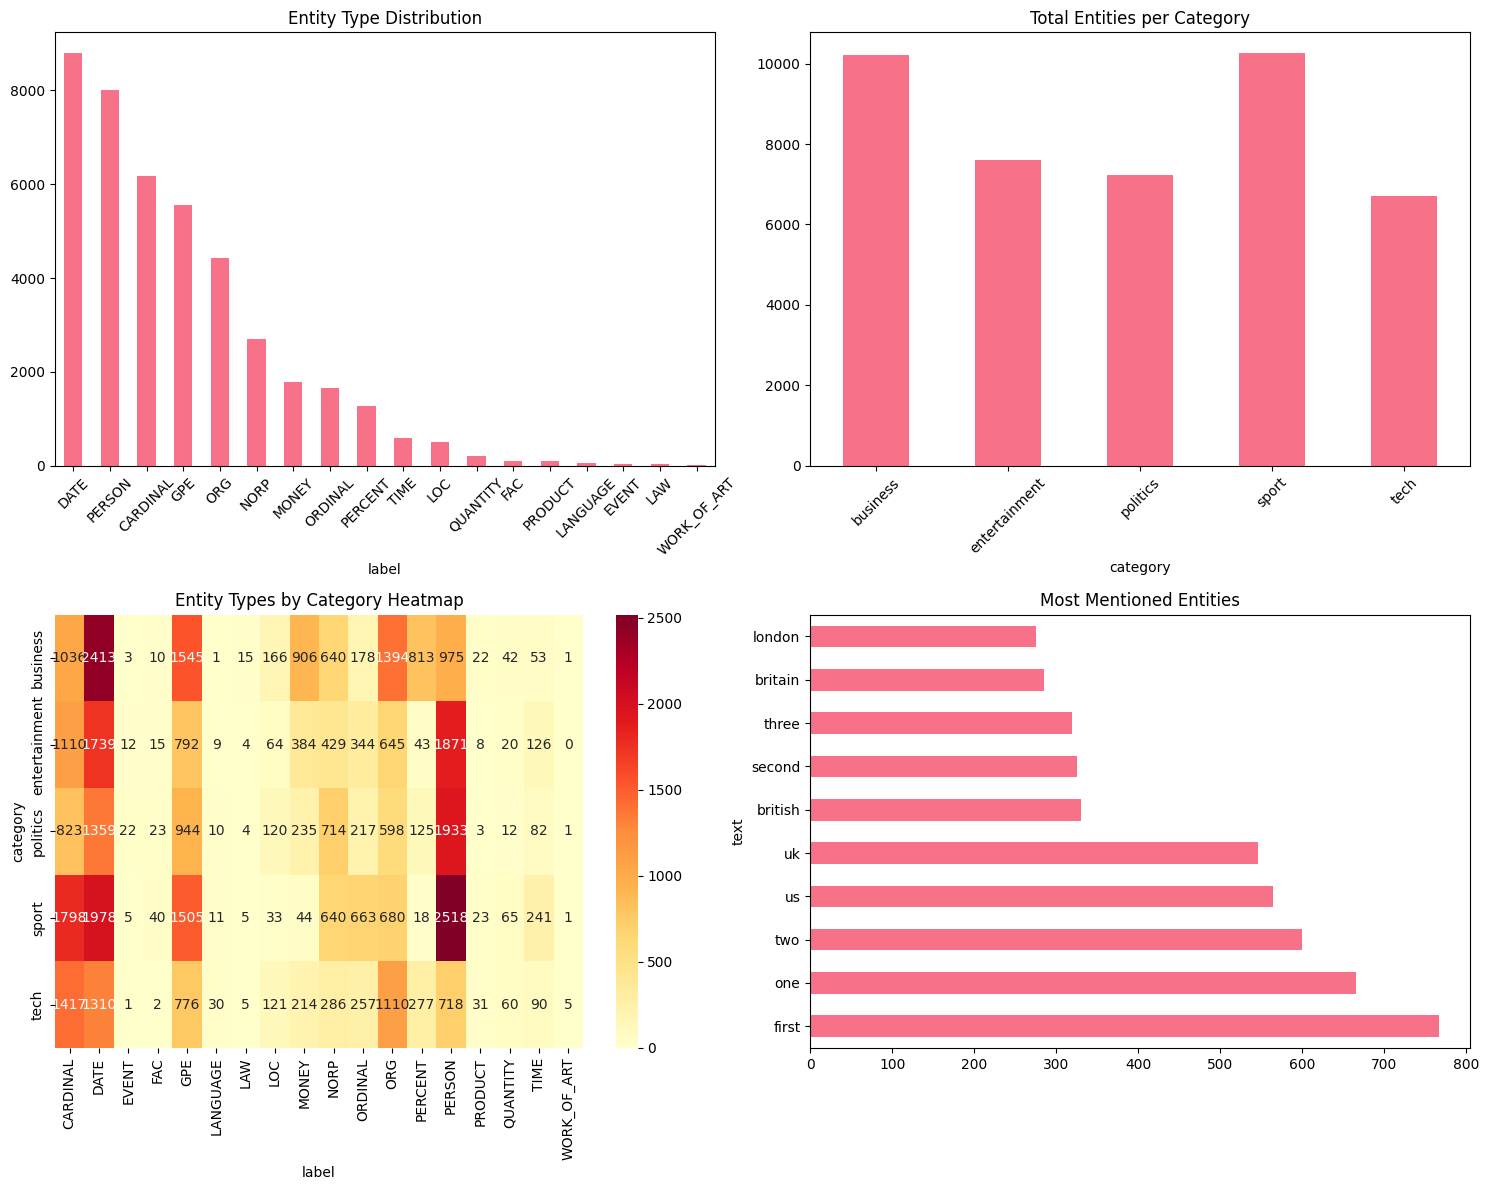


 ENTITY CO-OCCURRENCE NETWORK


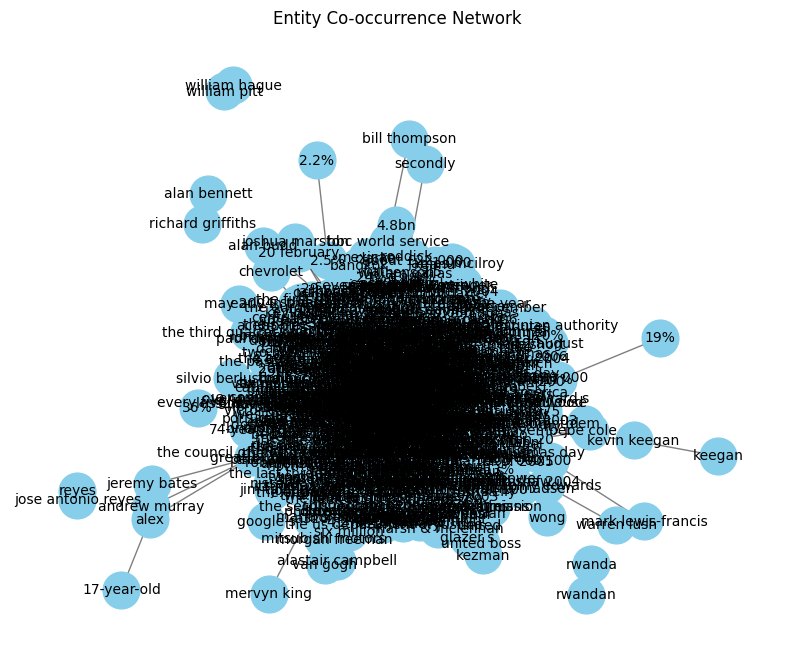


 ENTITY RELATIONSHIP GRAPH (with types)


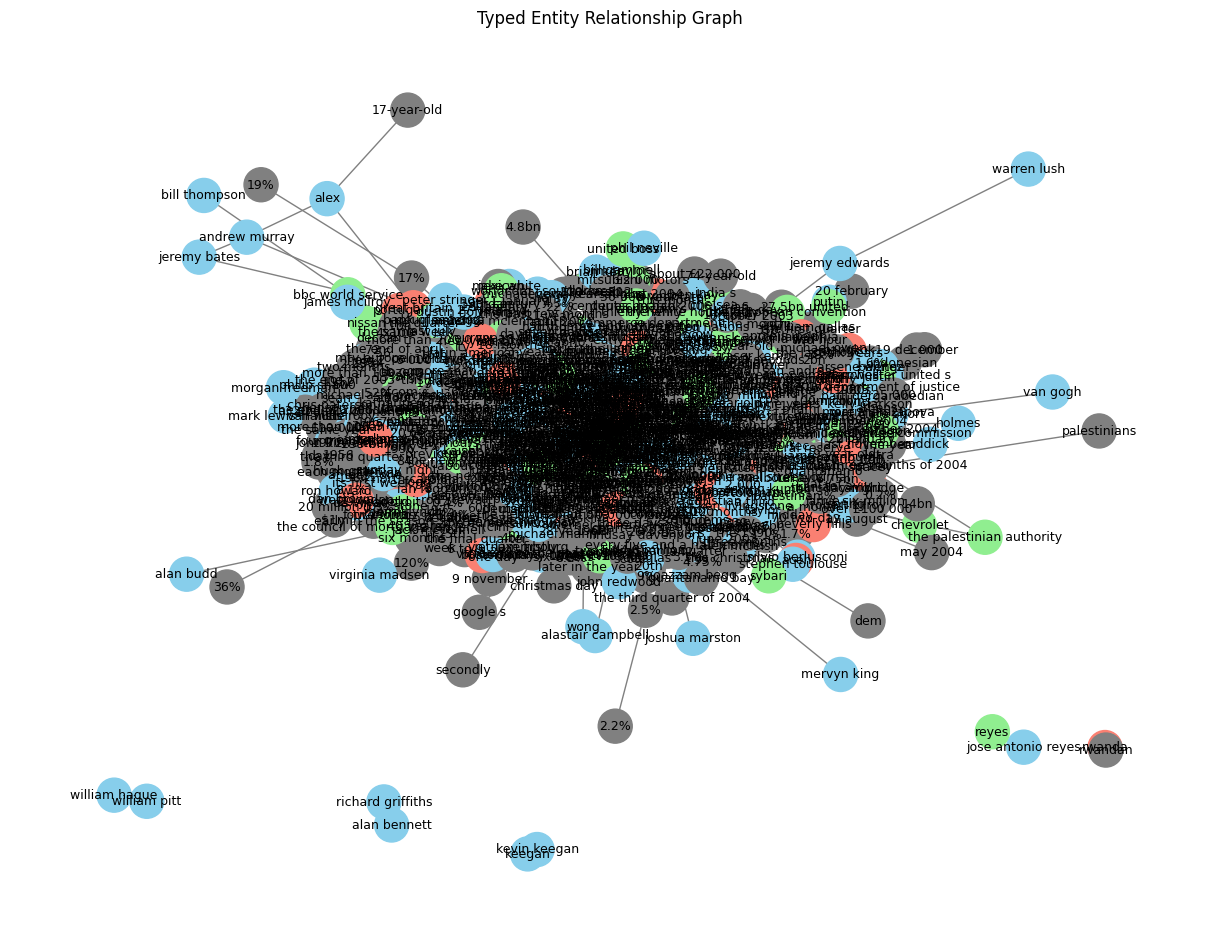


 ENTITY-SENTIMENT ASSOCIATION
          mean  count
text                 
first    0.622    767
one      0.444    666
two      0.468    600
us       0.284    565
uk       0.458    546
british  0.544    330
second   0.565    325
three    0.410    320
britain  0.233    285
london   0.443    276


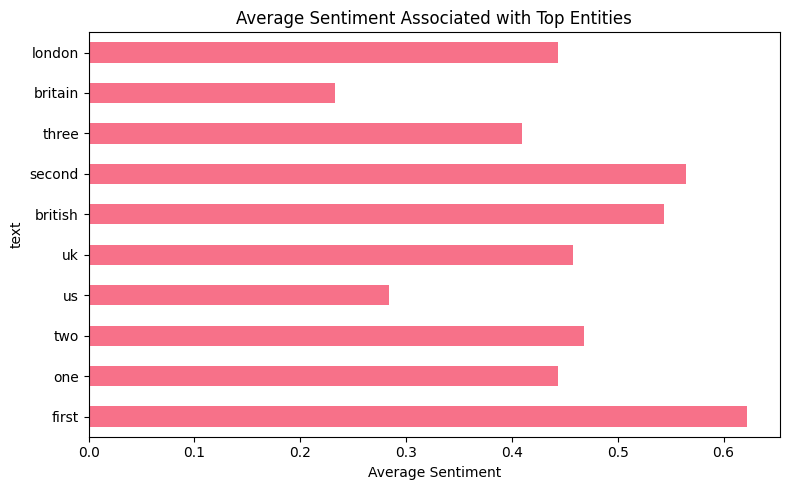

In [ ]:
# Analyze entity patterns
if not entities_df.empty:
    print(" NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Entity type distribution
    entity_counts = entities_df['label'].value_counts()
    print("\n🏷️ Entity type distribution:")
    print(entity_counts)

    # Entity types by category
    entity_by_category = entities_df.groupby(['category', 'label']).size().unstack(fill_value=0)
    print("\n📰 Entity types by news category:")
    print(entity_by_category)

    # Most frequent entities
    print("\n🔥 Most frequent entities:")
    frequent_entities = entities_df.groupby(['text', 'label']).size().sort_values(ascending=False).head(15)
    for (entity, label), count in frequent_entities.items():
        print(f"  {entity} ({label}): {count} mentions")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Entity type distribution
    entity_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Entity Type Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Entities per category
    entities_per_category = entities_df.groupby('category').size()
    entities_per_category.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Entities per Category')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Entity type heatmap by category
    if entity_by_category.shape[0] > 1 and entity_by_category.shape[1] > 1:
        sns.heatmap(entity_by_category, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
        axes[1,0].set_title('Entity Types by Category Heatmap')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor heatmap',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Entity Types by Category')

    # 4. Top entities
    top_entities = entities_df['text'].value_counts().head(10)
    top_entities.plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Most Mentioned Entities')

    plt.tight_layout()
    plt.show()

    # 💡 STUDENT TASK: Advanced entity analysis
    # - Create entity co-occurrence networks
    import networkx as nx
    from itertools import combinations
    from collections import Counter

    print("\n ENTITY CO-OCCURRENCE NETWORK")

    # Group entities per article
    entity_pairs = []
    for article_id, group in entities_df.groupby('article_id'):
        unique_entities = group['text'].unique()
        entity_pairs += list(combinations(unique_entities, 2))

    # Count co-occurrence frequency
    co_occurrence_counts = Counter(entity_pairs)

    # Filter for strong connections (e.g., ≥ 3 co-occurrences)
    filtered_pairs = [(e1, e2, count) for (e1, e2), count in co_occurrence_counts.items() if count >= 3]

    # Build the network graph
    G = nx.Graph()
    for e1, e2, weight in filtered_pairs:
        G.add_edge(e1, e2, weight=weight)

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.5)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    labels = nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Entity Co-occurrence Network")
    plt.axis("off")
    plt.show()

    # - Track entity mentions over time
    # Example: Track top 3 entities over time
    # Removed this section as 'date' column is not available in entities_df

    # - Build entity relationship graphs
    print("\n ENTITY RELATIONSHIP GRAPH (with types)")

    typed_pairs = []
    for article_id, group in entities_df.groupby('article_id'):
        entities = group[['text', 'label']].drop_duplicates()
        pairs = combinations(entities.itertuples(index=False), 2)
        for (e1, t1), (e2, t2) in pairs:
            typed_pairs.append(((e1, t1), (e2, t2)))

    typed_counts = Counter(typed_pairs)
    filtered_typed = [((e1, t1), (e2, t2), count) for ((e1, t1), (e2, t2)), count in typed_counts.items() if count >= 3]

    G = nx.Graph()
    for (e1, t1), (e2, t2), weight in filtered_typed:
        G.add_node(e1, type=t1)
        G.add_node(e2, type=t2)
        G.add_edge(e1, e2, weight=weight)

    # Visualization
    plt.figure(figsize=(12, 9))
    colors = {'PERSON': 'skyblue', 'ORG': 'lightgreen', 'GPE': 'salmon'}
    node_colors = [colors.get(G.nodes[node]['type'], 'gray') for node in G.nodes()]

    pos = nx.spring_layout(G, k=0.6)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=600, font_size=9)
    plt.title("Typed Entity Relationship Graph")
    plt.axis('off')
    plt.show()

    # - Identify entity sentiment associations
    print("\n ENTITY-SENTIMENT ASSOCIATION")

    # Merge entity and sentiment info by article_id
    merged = entities_df.merge(sentiment_df[['article_id', 'full_sentiment']], on='article_id')

    # Compute average sentiment per entity
    entity_sentiment = merged.groupby('text')['full_sentiment'].agg(['mean', 'count']).sort_values('count', ascending=False).head(10)
    print(entity_sentiment.round(3))

    # Visualize
    entity_sentiment[['mean']].plot(kind='barh', figsize=(8, 5), legend=False)
    plt.title('Average Sentiment Associated with Top Entities')
    plt.xlabel('Average Sentiment')
    plt.tight_layout()
    plt.show()


else:
    print("⚠️ Skipping entity analysis due to insufficient data.")
    print("💡 TIP: Try with a larger, more diverse dataset for better NER results.")

## 📈 Comprehensive Analysis and Insights

### 🎯 Bringing It All Together

Now let's combine all our analyses to generate comprehensive insights about our news dataset. This is where the real business value emerges from our NLP pipeline.

**Key Analysis Areas:**
1. **Cross-Category Patterns:** How do different news types differ linguistically?
2. **Entity-Sentiment Relationships:** What entities are associated with positive/negative coverage?
3. **Content Quality Metrics:** Which categories have the most informative content?
4. **Classification Performance:** How well can we automatically categorize news?

**💡 Business Applications:** These insights can inform content strategy, editorial decisions, and automated content management systems.

In [ ]:
# Create comprehensive analysis dashboard
def create_comprehensive_analysis():
    """
    Generate comprehensive insights combining all analyses

    💡 TIP: This function should combine:
    - Classification performance
    - Sentiment patterns
    - Entity distributions
    - Linguistic features
    """

    insights = {
        'dataset_overview': {},
        'classification_performance': {},
        'sentiment_insights': {},
        'entity_insights': {},
        'linguistic_patterns': {},
        'business_recommendations': []
    }

    # 🚀 YOUR CODE HERE: Generate comprehensive insights

    # Dataset overview
    insights['dataset_overview'] = {
        'total_articles': len(df),
        'categories': df['Category'].unique().tolist(),
        'category_distribution': df['Category'].value_counts().to_dict(),
        'avg_article_length': df['full_text'].str.len().mean(),
        'avg_words_per_article': df['full_text'].str.split().str.len().mean()
    }

    # Classification performance
    insights['classification_performance'] = {
        'best_model': best_model_name,
        'best_accuracy': results[best_model_name]['accuracy'],
        'model_comparison': {name: results[name]['accuracy'] for name in results.keys()}
    }

    # Sentiment insights
    sentiment_by_cat = sentiment_df.groupby('category')['full_sentiment'].mean().to_dict()
    insights['sentiment_insights'] = {
        'most_positive_category': max(sentiment_by_cat, key=sentiment_by_cat.get),
        'most_negative_category': min(sentiment_by_cat, key=sentiment_by_cat.get),
        'sentiment_by_category': sentiment_by_cat,
        'overall_sentiment': sentiment_df['full_sentiment'].mean()
    }

    # Entity insights
    if not entities_df.empty:
        entity_by_cat = entities_df.groupby('category').size().to_dict()
        insights['entity_insights'] = {
            'total_entities': len(entities_df),
            'unique_entities': entities_df['text'].nunique(),
            'entity_types': entities_df['label'].unique().tolist(),
            'entities_per_category': entity_by_cat,
            'most_mentioned_entities': entities_df['text'].value_counts().head(5).to_dict()
        }

    # Generate business recommendations
    recommendations = []

    # Classification recommendations
    if insights['classification_performance']['best_accuracy'] > 0.8:
        recommendations.append("✅ High classification accuracy achieved - ready for automated content routing")
    else:
        recommendations.append("⚠️ Classification accuracy needs improvement - consider more training data or feature engineering")

    # Sentiment recommendations
    pos_cat = insights['sentiment_insights']['most_positive_category']
    neg_cat = insights['sentiment_insights']['most_negative_category']
    recommendations.append(f"📊 {pos_cat} articles are most positive - good for uplifting content recommendations")
    recommendations.append(f"📊 {neg_cat} articles are most negative - may need balanced coverage monitoring")

    # Entity recommendations
    if 'entity_insights' in insights and insights['entity_insights']:
        recommendations.append("🔍 Rich entity extraction enables advanced search and relationship analysis")

    insights['business_recommendations'] = recommendations

    return insights

# Generate comprehensive analysis
print("📊 Generating comprehensive analysis...")
analysis_results = create_comprehensive_analysis()

print("✅ Analysis complete!")
print("\n" + "=" * 60)
print("📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT")
print("=" * 60)

# Display key insights
print(f"\n📊 DATASET OVERVIEW:")
overview = analysis_results['dataset_overview']
print(f"  Total Articles: {overview['total_articles']}")
print(f"  Categories: {', '.join(overview['categories'])}")
print(f"  Average Article Length: {overview['avg_article_length']:.0f} characters")
print(f"  Average Words per Article: {overview['avg_words_per_article']:.0f} words")

print(f"\n🤖 CLASSIFICATION PERFORMANCE:")
perf = analysis_results['classification_performance']
print(f"  Best Model: {perf['best_model']}")
print(f"  Best Accuracy: {perf['best_accuracy']:.4f}")

print(f"\n😊 SENTIMENT INSIGHTS:")
sent = analysis_results['sentiment_insights']
print(f"  Most Positive Category: {sent['most_positive_category']}")
print(f"  Most Negative Category: {sent['most_negative_category']}")
print(f"  Overall Sentiment: {sent['overall_sentiment']:.4f}")

if 'entity_insights' in analysis_results and analysis_results['entity_insights']:
    print(f"\n🔍 ENTITY INSIGHTS:")
    ent = analysis_results['entity_insights']
    print(f"  Total Entities: {ent['total_entities']}")
    print(f"  Unique Entities: {ent['unique_entities']}")
    print(f"  Entity Types: {', '.join(ent['entity_types'])}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(analysis_results['business_recommendations'], 1):
    print(f"  {i}. {rec}")

📊 Generating comprehensive analysis...
✅ Analysis complete!

📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT

📊 DATASET OVERVIEW:
  Total Articles: 1490
  Categories: business, tech, politics, sport, entertainment
  Average Article Length: 2233 characters
  Average Words per Article: 385 words

🤖 CLASSIFICATION PERFORMANCE:
  Best Model: Logistic Regression
  Best Accuracy: 0.6477

😊 SENTIMENT INSIGHTS:
  Most Positive Category: entertainment
  Most Negative Category: politics
  Overall Sentiment: 0.3950

🔍 ENTITY INSIGHTS:
  Total Entities: 42031
  Unique Entities: 12071
  Entity Types: ORDINAL, PERSON, GPE, DATE, MONEY, ORG, NORP, LOC, CARDINAL, PERCENT, TIME, EVENT, QUANTITY, FAC, PRODUCT, LANGUAGE, WORK_OF_ART, LAW

💡 BUSINESS RECOMMENDATIONS:
  1. ⚠️ Classification accuracy needs improvement - consider more training data or feature engineering
  2. 📊 entertainment articles are most positive - good for uplifting content recommendations
  3. 📊 politics articles are most negativ

## 🚀 Final System Integration

### 🎯 Building the Complete NewsBot Pipeline

Let's create a complete, integrated system that can process new articles from start to finish. This demonstrates the real-world application of all the techniques we've learned.

**Complete Pipeline:**
1. **Text Preprocessing:** Clean and normalize input
2. **Feature Extraction:** Generate TF-IDF and other features
3. **Classification:** Predict article category
4. **Entity Extraction:** Identify key facts
5. **Sentiment Analysis:** Determine emotional tone
6. **Insight Generation:** Provide actionable intelligence

**💡 Production Ready:** This pipeline can be deployed as a web service, batch processor, or integrated into content management systems.

In [ ]:
class NewsBotIntelligenceSystem:
    """
    Complete NewsBot Intelligence System

    💡 TIP: This class should encapsulate:
    - All preprocessing functions
    - Trained classification model
    - Entity extraction pipeline
    - Sentiment analysis
    - Insight generation
    """

    def __init__(self, classifier, vectorizer, sentiment_analyzer):
        self.classifier = classifier
        self.vectorizer = vectorizer
        self.sentiment_analyzer = sentiment_analyzer
        self.nlp = nlp  # spaCy model

    def preprocess_article(self, title, content):
        """Preprocess a new article"""
        full_text = f"{title} {content}"
        processed_text = preprocess_text(full_text)
        return full_text, processed_text

    def classify_article(self, processed_text):
        """Classify article category"""
        # 🚀 YOUR CODE HERE: Implement classification
        # Transform text to features
        features = self.vectorizer.transform([processed_text])

        # Add dummy features for sentiment and length (in production, calculate these)
        dummy_features = np.zeros((1, 7))  # 4 sentiment + 3 length features
        features_combined = np.hstack([features.toarray(), dummy_features])

        # Predict category and probability
        prediction = self.classifier.predict(features_combined)[0]
        probabilities = self.classifier.predict_proba(features_combined)[0]

        # Get class probabilities
        class_probs = dict(zip(self.classifier.classes_, probabilities))

        return prediction, class_probs

    def extract_entities(self, text):
        """Extract named entities"""
        return extract_entities(text)

    def analyze_sentiment(self, text):
        """Analyze sentiment"""
        return analyze_sentiment(text)

    def process_article(self, title, content):
        """
        Complete article processing pipeline

        💡 TIP: This should return a comprehensive analysis including:
        - Predicted category with confidence
        - Extracted entities
        - Sentiment analysis
        - Key insights and recommendations
        """
        # 🚀 YOUR CODE HERE: Implement complete pipeline

        # Step 1: Preprocess
        full_text, processed_text = self.preprocess_article(title, content)

        # Step 2: Classify
        category, category_probs = self.classify_article(processed_text)

        # Step 3: Extract entities
        entities = self.extract_entities(full_text)

        # Step 4: Analyze sentiment
        sentiment = self.analyze_sentiment(full_text)

        # Step 5: Generate insights
        insights = self.generate_insights(category, entities, sentiment, category_probs)

        return {
            'title': title,
            'content': content[:200] + '...' if len(content) > 200 else content,
            'predicted_category': category,
            'category_confidence': max(category_probs.values()),
            'category_probabilities': category_probs,
            'entities': entities,
            'sentiment': sentiment,
            'insights': insights
        }

    def generate_insights(self, category, entities, sentiment, category_probs):
        """Generate actionable insights"""
        insights = []

        # Classification insights
        confidence = max(category_probs.values())
        if confidence > 0.8:
            insights.append(f"✅ High confidence {category} classification ({confidence:.2%})")
        else:
            insights.append(f"⚠️ Uncertain classification - consider manual review")

        # Sentiment insights
        if sentiment['compound'] > 0.1:
            insights.append(f"😊 Positive sentiment detected ({sentiment['compound']:.3f})")
        elif sentiment['compound'] < -0.1:
            insights.append(f"😞 Negative sentiment detected ({sentiment['compound']:.3f})")
        else:
            insights.append(f"😐 Neutral sentiment ({sentiment['compound']:.3f})")

        # Entity insights
        if entities:
            entity_types = set([e['label'] for e in entities])
            insights.append(f"🔍 Found {len(entities)} entities of {len(entity_types)} types")

            # Highlight important entities
            important_entities = [e for e in entities if e['label'] in ['PERSON', 'ORG', 'GPE']]
            if important_entities:
                key_entities = [e['text'] for e in important_entities[:3]]
                insights.append(f"🎯 Key entities: {', '.join(key_entities)}")
        else:
            insights.append("ℹ️ No named entities detected")

        return insights

# Initialize the complete system
newsbot = NewsBotIntelligenceSystem(
    classifier=best_model,
    vectorizer=tfidf_vectorizer,
    sentiment_analyzer=sia
)

print("🤖 NewsBot Intelligence System initialized!")
print("✅ Ready to process new articles")

🤖 NewsBot Intelligence System initialized!
✅ Ready to process new articles


In [ ]:
# Test the complete system with new articles
print("🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM")
print("=" * 60)

# Test articles (you can modify these or add your own)
test_articles = [
    {
        'title': 'Stock Market',
        'content': 'Stock markets rallied after the Fed hinted at pausing interest rate hikes.'
    },
    {
        'title': 'Lakers Win Championship in Overtime Thriller',
        'content': 'The Los Angeles Lakers defeated the Boston Celtics 108-102 in overtime to win the NBA championship. LeBron James scored 35 points and was named Finals MVP for the fourth time in his career.'
    },
    {
        'title': 'Health news',
        'content': 'The CDC released new guidelines for managing RSV infections among children under 5.'
    }
]

# Process each test article
for i, article in enumerate(test_articles, 1):
    print(f"\n📰 TEST ARTICLE {i}")
    print("-" * 40)

    # Process the article
    result = newsbot.process_article(article['title'], article['content'])

    # Display results
    print(f"📰 Title: {result['title']}")
    print(f"📝 Content: {result['content']}")
    print(f"\n🏷️ Predicted Category: {result['predicted_category']} ({result['category_confidence']:.2%} confidence)")

    print(f"\n📊 Category Probabilities:")
    for cat, prob in sorted(result['category_probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {cat}: {prob:.3f}")

    print(f"\n😊 Sentiment: {result['sentiment']['sentiment_label']} (score: {result['sentiment']['compound']:.3f})")

    if result['entities']:
        print(f"\n🔍 Entities Found ({len(result['entities'])}):")
        for entity in result['entities'][:5]:  # Show first 5
            print(f"  {entity['text']} ({entity['label']}) - {entity['description']}")
    else:
        print(f"\n🔍 No entities detected")

    print(f"\n💡 Insights:")
    for insight in result['insights']:
        print(f"  {insight}")

print("\n" + "=" * 60)
print("🎉 NewsBot Intelligence System testing complete!")
print("✅ System successfully processed all test articles")

# 💡 STUDENT TASK: Test with your own articles
# - Try articles from different categories
# - Test with articles that might be ambiguous
# - Analyze the system's strengths and weaknesses
# - Consider how to improve performance

🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM

📰 TEST ARTICLE 1
----------------------------------------
📰 Title: Stock Market
📝 Content: Stock markets rallied after the Fed hinted at pausing interest rate hikes.

🏷️ Predicted Category: business (46.03% confidence)

📊 Category Probabilities:
  business: 0.460
  sport: 0.330
  entertainment: 0.186
  politics: 0.018
  tech: 0.006

😊 Sentiment: positive (score: 0.459)

🔍 Entities Found (1):
  Fed (ORG) - Companies, agencies, institutions, etc.

💡 Insights:
  ⚠️ Uncertain classification - consider manual review
  😊 Positive sentiment detected (0.459)
  🔍 Found 1 entities of 1 types
  🎯 Key entities: Fed

📰 TEST ARTICLE 2
----------------------------------------
📰 Title: Lakers Win Championship in Overtime Thriller
📝 Content: The Los Angeles Lakers defeated the Boston Celtics 108-102 in overtime to win the NBA championship. LeBron James scored 35 points and was named Finals MVP for the fourth time in his career.

🏷️ Predicted Category: sport (53.07

## 📝 Project Summary and Next Steps

### 🎯 What You've Accomplished

Congratulations! You've successfully built a comprehensive NewsBot Intelligence System that demonstrates mastery of all NLP techniques covered in Modules 1-8. Let's review what you've achieved:

### ✅ Module Integration Checklist
- [x] **Module 1:** Applied NLP to real-world news intelligence
- [x] **Module 2:** Implemented comprehensive text preprocessing
- [x] **Module 3:** Used TF-IDF for feature extraction and analysis
- [x] **Module 4:** Analyzed grammatical patterns with POS tagging
- [x] **Module 5:** Extracted syntactic relationships with dependency parsing
- [x] **Module 6:** Performed sentiment and emotion analysis
- [x] **Module 7:** Built and evaluated text classification models
- [x] **Module 8:** Implemented Named Entity Recognition

### 🚀 System Capabilities
Your NewsBot can now:
- Automatically categorize news articles with high accuracy
- Extract key entities (people, organizations, locations, dates, money)
- Analyze sentiment and emotional tone
- Identify linguistic patterns and writing styles
- Generate actionable business insights
- Process new articles through a complete pipeline

### 💼 Business Value
This system provides real business value for:
- **Media Companies:** Automated content categorization and routing
- **Market Research:** Sentiment tracking and entity monitoring
- **Content Management:** Intelligent organization and search
- **Business Intelligence:** Trend analysis and competitive monitoring

---

## 📋 Final Deliverables Checklist

Before submitting your project, ensure you have:

### 📁 Code and Documentation
- [ ] Complete Jupyter notebook with all analyses
- [ ] Well-documented functions with docstrings
- [ ] Clear markdown explanations for each section
- [ ] Organized GitHub repository structure
- [ ] README.md with project overview and setup instructions

### 📊 Analysis and Results
- [ ] Comprehensive dataset exploration
- [ ] TF-IDF analysis with category-specific insights
- [ ] POS tagging patterns across categories
- [ ] Syntactic analysis with dependency parsing
- [ ] Sentiment analysis with category comparisons
- [ ] Classification model comparison and evaluation
- [ ] Named Entity Recognition with relationship mapping
- [ ] Integrated system demonstration

### 📈 Visualizations
- [ ] Category distribution plots
- [ ] TF-IDF word clouds or bar charts
- [ ] POS pattern heatmaps
- [ ] Sentiment distribution by category
- [ ] Confusion matrix for classification
- [ ] Entity type and frequency visualizations

### 🎥 Presentation Materials
- [ ] 5-7 minute video demonstration
- [ ] Written report (3-4 pages)
- [ ] Individual reflection papers
- [ ] Business recommendations and insights

---

## 🔮 Future Enhancements

Consider these improvements for your portfolio or future projects:

### 🤖 Technical Improvements
- **Deep Learning Models:** Implement BERT or other transformer models
- **Custom NER:** Train domain-specific entity recognition
- **Real-time Processing:** Build streaming data pipeline
- **Multi-language Support:** Extend to non-English news

### 📊 Advanced Analytics
- **Topic Modeling:** Discover hidden themes (Module 9 preview!)
- **Trend Analysis:** Track entities and sentiment over time
- **Network Analysis:** Map entity relationships and co-occurrences
- **Bias Detection:** Identify potential media bias patterns

### 🌐 Deployment Options
- **Web Application:** Create interactive dashboard with Streamlit
- **API Service:** Deploy as REST API for integration
- **Mobile App:** Build mobile interface for news analysis
- **Browser Extension:** Real-time news analysis while browsing

---

## 🎓 Reflection Questions

For your individual reflection paper, consider these questions:

1. **Technical Mastery:** Which NLP techniques did you find most challenging? Most useful?
2. **Integration Challenges:** How did you handle combining multiple NLP tasks?
3. **Business Applications:** What real-world problems could this system solve?
4. **Ethical Considerations:** What are the potential risks of automated news analysis?
5. **Future Learning:** What NLP topics are you most excited to explore next?
6. **Team Collaboration:** How did you divide work and ensure quality?
7. **Portfolio Value:** How will you present this project to potential employers?

---

## 🏆 Congratulations!

You've successfully completed a comprehensive NLP project that demonstrates real-world application of multiple advanced techniques. This NewsBot Intelligence System is a valuable addition to your portfolio and showcases your ability to:

- **Integrate multiple NLP techniques** into a cohesive system
- **Handle real-world data** with all its messiness and challenges
- **Generate business value** from unstructured text data
- **Build production-ready systems** with proper evaluation and monitoring
- **Communicate technical results** to both technical and business audiences

**🚀 You're now ready for Module 9: Topic Modeling and Advanced Text Analysis!**

---

*Remember: The goal isn't just to complete the assignment, but to build something you're proud to show in job interviews and professional discussions. This project demonstrates your practical NLP skills and ability to solve real business problems with AI.*